### Problem Statement: A financial institution is experiencing increased loan defaults and wants to mitigate risks by improving its loan approval process. Need to analyze historical loan data to identify key factors that predict defaults. 

# Module 1 Assignment - EDA


## 1) Importing the Modules

In [1020]:
#!pip install scikit-learn pandas numpy matplotlib seaborn plotly pycaret

In [1022]:
# data
import pandas as pd
import numpy as np

# Set display options to show all columns and rows in the DataFrame output 
pd.set_option('display.max_columns', None)
# visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# seaborn
import seaborn as sns

# plotly
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

from sklearn import datasets
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# styling
%matplotlib inline
sns.set_style('darkgrid')
mpl.rcParams['font.size'] = 12
mpl.rcParams['figure.facecolor'] = '#00000000'
mpl.rcParams['font.size'] = 12
mpl.rcParams['figure.facecolor'] = '#00000000'

# sklearn
from sklearn.model_selection import train_test_split

# os module for interacting with the operating system
import os 

# Suppress all warning messages to keep the output clean
import warnings
warnings.filterwarnings("ignore")

## 2) Loading the Data

In [1025]:
# loading the data
data = pd.read_csv('application_train.csv')
# Print sample
data.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

- The dataset is loaded successfully.

In [1027]:
# Dimensions of the dataset
data.shape

(307511, 122)

- There are total 307511 rows and 122 columns in the Dataset

In [1029]:
# Summarizes the numerical columns in the dataset
data.describe()


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

- Summary statistics shown above for numerical columns, this includes the count, mean, standard deviation, min, 25%, 50%, 75%, and max values
- There are 106 numerical columns out of a total of 122 in the dataset.


In [663]:
# summary of the DataFrame
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


The dataset contains the following columns by data type:
- 65 columns are of type Float (numerical values with floating-point precision)
41 columns are of type Int (numerical values with integer values).
16 columns are of type Object (categorical values, typically strings or labels).

In [665]:
# column description
data.head(10)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

Below is the description for few features in the dataset
- SK_ID_CURR : It is a Unique identifier for each record of the data
- TARGET : This feild tells whether is loan is default or not(1=default,0= not default)
- NAME_CONTRACT_TYPE:  This feild tell the loan type whether its Cash loans or Revolving loans	
- CODE_GENDER: Represent Gender M is male, F is female
- FLAG_OWN_CAR : Represent whether applicant has car or not
- FLAG_OWN_REALTY: Represent applicant has own real estate or not
- CNT_CHILDREN: Represent count of the childen
- AMT_INCOME_TOTAL: Represent the annual income of the applicant
- AMT_CREDIT: Represent total amount of credit the applicant is requesting
- AMT_ANNUITY : Represent amount person pay annually for loan
- AMT_GOODS_PRICE : Represent price of the goods or items the loan was taken out for
- NAME_TYPE_SUITE: Represent accommodation the individual is living in.It might have values like "Family", "Children", "Group of people", etc
- NAME_INCOME_TYPE: Represent the income type
- NAME_EDUCATION_TYPE: Represent the education of the applicant
- NAME_FAMILY_STATUS: Represent family status whether married or not
- NAME_HOUSING_TYPE: Represent type of housing he is living like House / apartment	,rented appartment etc
- DAYS_BIRTH : Number of days after birth
- DAYS_EMPLOYED: Represent number of days of employment


In [667]:
#splitting the dataset
#from sklearn.model_selection import train_test_split


#X = data.drop('TARGET', axis=1) 
#y = data['TARGET']

# Split into 80% training and 20% testing
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 3) Data cleaning

### checking data type

In [670]:
# checking feature types (categorical, numerical, and binary).
categorical_features = data.select_dtypes(include=['object']).columns
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns
binary_features = [col for col in numerical_features if data[col].nunique() == 2]

print(f"Categorical: {len(categorical_features)}, Numerical: {len(numerical_features)}, Binary: {len(binary_features)}")
print("Categorical Features:", categorical_features)
print("Numerical Features:", numerical_features)
print("Binary Features:", binary_features)


Categorical: 16, Numerical: 106, Binary: 33
Categorical Features: Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')
Numerical Features: Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=1

There are total 106 numerical Features(33 binary features in numerical Features) and 16 categorical features

In [672]:
# checking the datatype of the categorical_features
data[categorical_features].head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block,No
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,NaN,NaN,NaN,NaN
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,NaN,NaN,NaN,NaN
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,NaN,NaN,NaN,NaN


- All the categorical_features are having data type as object

In [674]:
# checking the datatype of the numerical_features
data[numerical_features].head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,1.0,2,2,10,0,0,0,0,0,0,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,0.0149,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,2.0,1,1,11,0,0,0,0,0,0,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,0.0714,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,1.0,2,2,9,0,0,0,0,0,0,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,2.0,2,2,17,0,0,0,0,0,0,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,1.0,2,2,11,0,0,0,0,1,1,NaN,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

- All the numerical_features are having data type as float/int

In [676]:
# checking the datatype of the binary_features
data[binary_features].head()

,TARGET,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


- All the binary_features are having the binary values(0/1)

### Converting negative values to absolute values 

In [681]:
# Convert negative values to positive (absolute values)
data['DAYS_BIRTH'] = abs(data['DAYS_BIRTH'])
data['DAYS_EMPLOYED'] = abs(data['DAYS_EMPLOYED'])
data['DAYS_REGISTRATION'] = abs(data['DAYS_REGISTRATION'])
data['DAYS_ID_PUBLISH'] = abs(data['DAYS_ID_PUBLISH'])
data['DAYS_LAST_PHONE_CHANGE'] = abs(data['DAYS_LAST_PHONE_CHANGE'])
print(data[['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE']].head(5))

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0        9461            637             3648.0             2120   
1       16765           1188             1186.0              291   
2       19046            225             4260.0             2531   
3       19005           3039             9833.0             2437   
4       19932           3038             4311.0             3458   

   DAYS_LAST_PHONE_CHANGE  
0                  1134.0  
1                   828.0  
2                   815.0  
3                   617.0  
4                  1106.0  


- The specified columns are changed to the absolute values

### checking null values

In [684]:
# checking all columns null values
data.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

- Few columns has null values

In [686]:
# analysing the categorical_features which are having null values
null_categorical_features = data[categorical_features].isnull().sum()
null_features = null_categorical_features[null_categorical_features > 0]
null_features

NAME_TYPE_SUITE          1292
OCCUPATION_TYPE         96391
FONDKAPREMONT_MODE     210295
HOUSETYPE_MODE         154297
WALLSMATERIAL_MODE     156341
EMERGENCYSTATE_MODE    145755
dtype: int64

- Total 6 categorical columns having null values

In [690]:
# # Imputation with mode
# for col in categorical_features:
#     mode_value = data[col].mode()[0]  # Get the most frequent value
#     data[col].fillna(mode_value, inplace=True)


<!-- - Imputed the missing values in categorical features with their mode -->

In [694]:
# # analysing the numerical_features which are having null values
# null_numerical_features = data[numerical_features].isnull().sum()
# null_features = null_numerical_features[null_numerical_features > 0]
# null_features


<!-- - Above columns have the null values in the numerical features -->

In [696]:
# # Imputation with mean
# for col in numerical_features:
#     data[col + '_NA'] = data[col].isna().astype(int)
#     mean_value = data[col].mean()
#     data[col].fillna(mean_value, inplace=True)

<!-- - Imputed the missing values in categorical features with their mean -->

In [700]:
# data.isnull().sum()[data.isnull().sum() > 0]

<!-- - The null values are imputed with mean and mode according to the datatype and there are no null values in the dataset now -->

### checking unique values

In [705]:
# Unique values for categorical, numerical, and binary features
data[categorical_features].nunique()

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [706]:
data[numerical_features].nunique()

SK_ID_CURR                      307511
TARGET                               2
CNT_CHILDREN                        15
AMT_INCOME_TOTAL                  2548
AMT_CREDIT                        5603
AMT_ANNUITY                      13672
AMT_GOODS_PRICE                   1002
REGION_POPULATION_RELATIVE          81
DAYS_BIRTH                       17460
DAYS_EMPLOYED                    12574
DAYS_REGISTRATION                15688
DAYS_ID_PUBLISH                   6168
OWN_CAR_AGE                         62
FLAG_MOBIL                           2
FLAG_EMP_PHONE                       2
FLAG_WORK_PHONE                      2
FLAG_CONT_MOBILE                     2
FLAG_PHONE                           2
FLAG_EMAIL                           2
CNT_FAM_MEMBERS                     17
REGION_RATING_CLIENT                 3
REGION_RATING_CLIENT_W_CITY          3
HOUR_APPR_PROCESS_START             24
REG_REGION_NOT_LIVE_REGION           2
REG_REGION_NOT_WORK_REGION           2
LIVE_REGION_NOT_WORK_REGI

- The unique values acording to the datatype displayed above, the binary category has 2 unique value which seems accurate for binary flags.


### checking duplicates

In [711]:
data.duplicated().sum()


0

- There are no dublicated in the dataset

### summarizing the numerical features

In [715]:
data[numerical_features].describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,16036.995067,67724.742149,4986.120328,2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97775

- Analysing the max and min values for the numerical features
- The max are min values for the binary features are in the correct range 

### Checking the Imbalance 

In [719]:
# Checking Imbalance
data['TARGET'].value_counts() 

TARGET
0    282686
1     24825
Name: count, dtype: int64

- The target variable is imbalanced, with a disproportionate number of instances in each class. The majority class (0) has 282,686 instances, while the minority class (1) has only 24,825 instances.

In [723]:
data['CODE_GENDER'].value_counts() 

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

- There are more females compared to male

In [725]:
data['NAME_INCOME_TYPE'].value_counts() 

NAME_INCOME_TYPE
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: count, dtype: int64

- Most of the applicants are working 

In [728]:
data['NAME_EDUCATION_TYPE'].value_counts() 

NAME_EDUCATION_TYPE
Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: count, dtype: int64

- Most of the applicants studied secondary / secondary special 

In [731]:
data['NAME_FAMILY_STATUS'].value_counts() 


NAME_FAMILY_STATUS
Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: count, dtype: int64

- Most of the applicants are Married

In [734]:
data['NAME_HOUSING_TYPE'].value_counts() 


NAME_HOUSING_TYPE
House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: count, dtype: int64

- Most of the applicants live in House / apartment

In [736]:
# List of important features
imp_features = [
    'APARTMENTS_MODE', 'CODE_GENDER', 'DAYS_BIRTH', 'DAYS_ID_PUBLISH',
    'DAYS_LAST_PHONE_CHANGE', 'EMERGENCYSTATE_MODE', 'ENTRANCES_AVG',
    'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'FLAG_OWN_CAR',
    'FLAG_OWN_REALTY', 'FLOORSMAX_AVG', 'FONDKAPREMONT_MODE',
    'HOUSETYPE_MODE', 'LIVINGAPARTMENTS_MODE', 'NAME_CONTRACT_TYPE',
    'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
    'NAME_INCOME_TYPE', 'NAME_TYPE_SUITE', 'OCCUPATION_TYPE',
    'ORGANIZATION_TYPE', 'OWN_CAR_AGE', 'WALLSMATERIAL_MODE',
    'WEEKDAY_APPR_PROCESS_START', 'YEARS_BUILD_AVG',
    'YEARS_BUILD_MEDI', 'YEARS_BUILD_MODE','TARGET'
]

imp_categorical_features = [feature for feature in imp_features if feature in data.select_dtypes(include=['object']).columns]
imp_numerical_features = [feature for feature in imp_features if feature in data.select_dtypes(include=['float64', 'int64']).columns]
# Display the head of the selected features
data[imp_features].head()

,APARTMENTS_MODE,CODE_GENDER,DAYS_BIRTH,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,EMERGENCYSTATE_MODE,ENTRANCES_AVG,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLOORSMAX_AVG,FONDKAPREMONT_MODE,HOUSETYPE_MODE,LIVINGAPARTMENTS_MODE,NAME_CONTRACT_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,NAME_INCOME_TYPE,NAME_TYPE_SUITE,OCCUPATION_TYPE,ORGANIZATION_TYPE,OWN_CAR_AGE,WALLSMATERIAL_MODE,WEEKDAY_APPR_PROCESS_START,YEARS_BUILD_AVG,YEARS_BUILD_MEDI,YEARS_BUILD_MODE,TARGET
0,0.0252,M,9461,2120,1134.0,No,0.0690,0.083037,0.262949,0.139376,N,Y,0.0833,reg oper account,block of flats,0.022,Cash loans,Secondary / secondary special,Single / not married,House / apartment,Working,Unaccompanied,Laborers,Business Entity Type 3,NaN,"Stone, brick",WEDNESDAY,0.6192,0.6243,0.6341,1
1,0.0924,F,16765,291,828.0,No,0.0345,0.311267,0.622246,NaN,N,N,0.2917,reg oper account,block of flats,0.079,Cash loans,Higher education,Married,House / apartment,State servant,Family,Core staff,School,NaN,Block,MONDAY,0.7960,0.7987,0.8040,0
2,NaN,M,19046,2531,815.0,NaN,NaN,NaN,0.555912,0.729567,Y,Y,NaN,NaN,NaN,NaN,Revolving loans,Secondary / secondary special,Single / not married,House / apartment,Working,Unaccompanied,Laborers,Government,26.0,NaN,MONDAY,NaN,NaN,NaN,0
3,NaN,F,19005,2437,617.0,NaN,NaN,NaN,0.650442,NaN,N,Y,NaN,NaN,NaN,NaN,Cash loans,Secondary / secondary special,Civil marriage,House / apartment,Working,Unaccompanied,Laborers,Business Entity Type 3,NaN,NaN,WEDNESDAY,NaN,NaN,NaN,0
4,NaN,M,19932,3458,1106.0,NaN,NaN,NaN,0.322738,NaN,N,Y,NaN,NaN,NaN,NaN,Cash loans,Secondary / secondary special,Single / not married,House / apartment,Working,Unaccompanied,Core staff,Religion,NaN,NaN,THURSDAY,NaN,NaN,NaN,0


## 4) EDA

### Univariate analysis

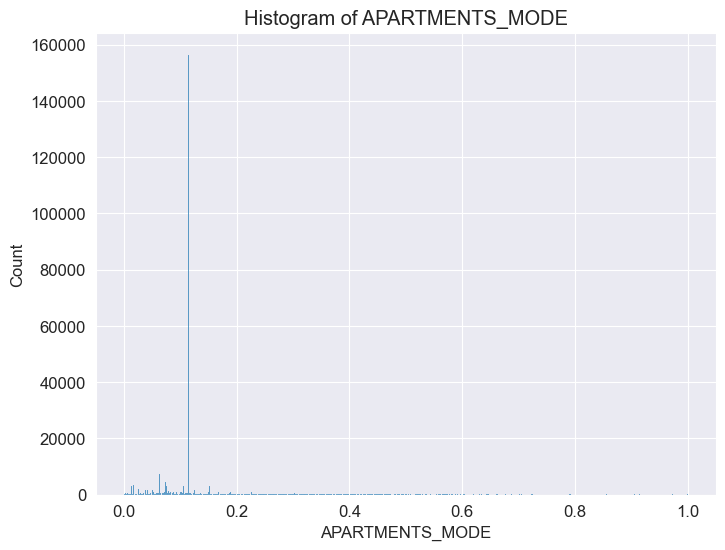

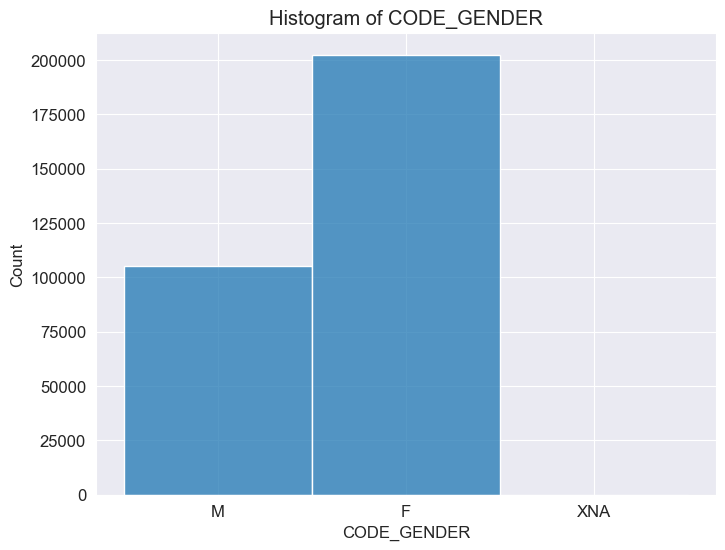

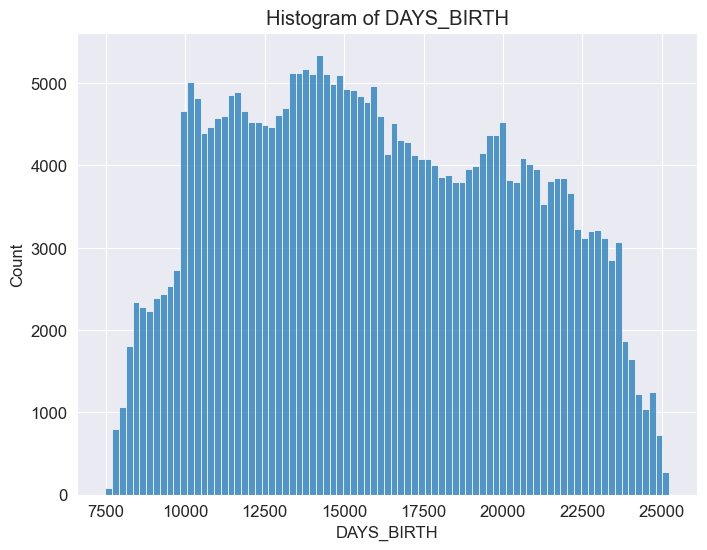

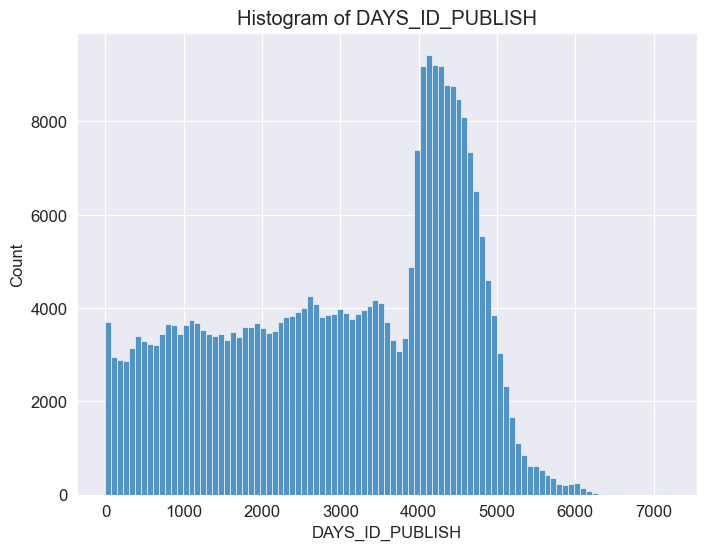

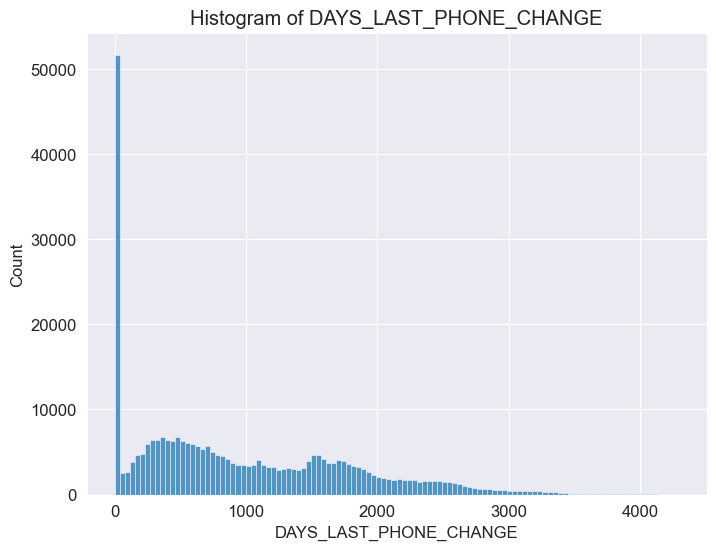

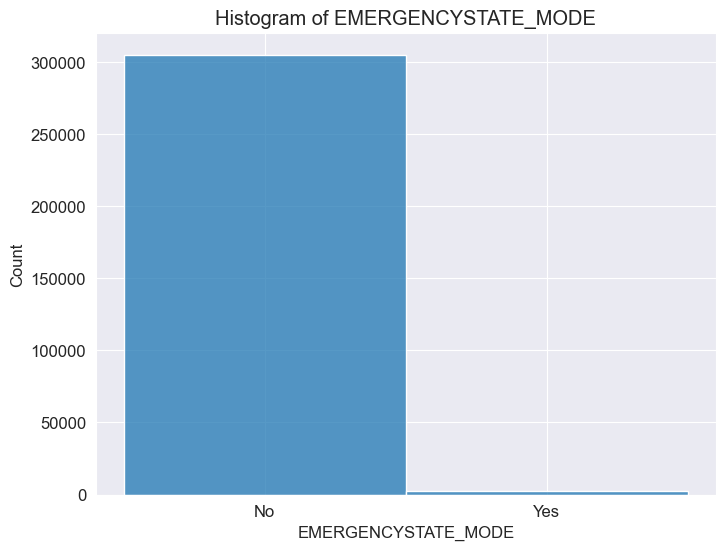

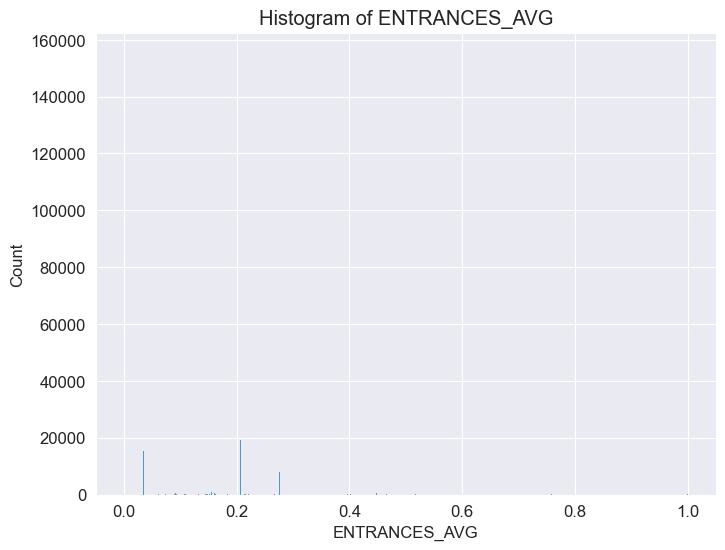

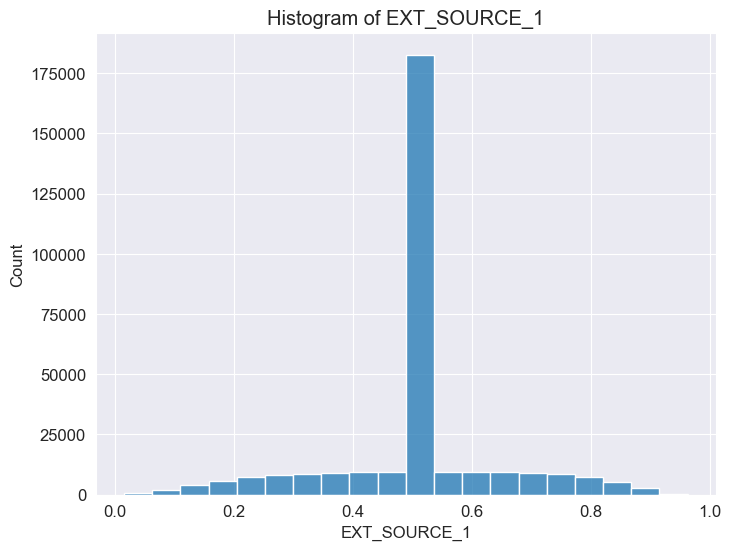

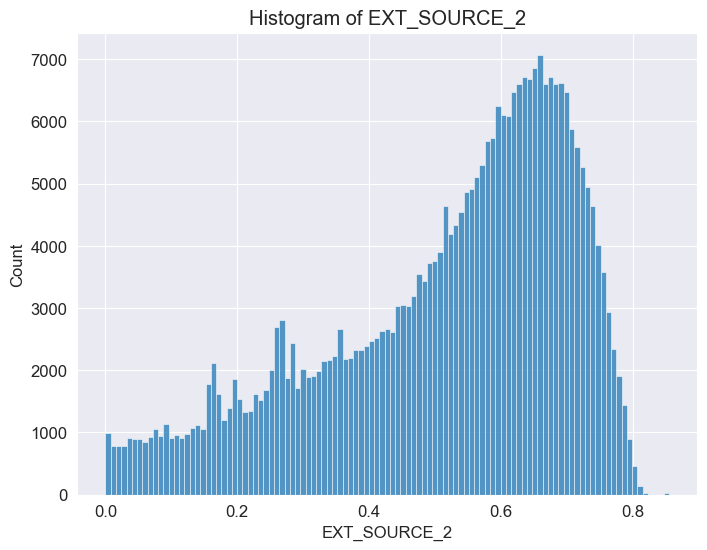

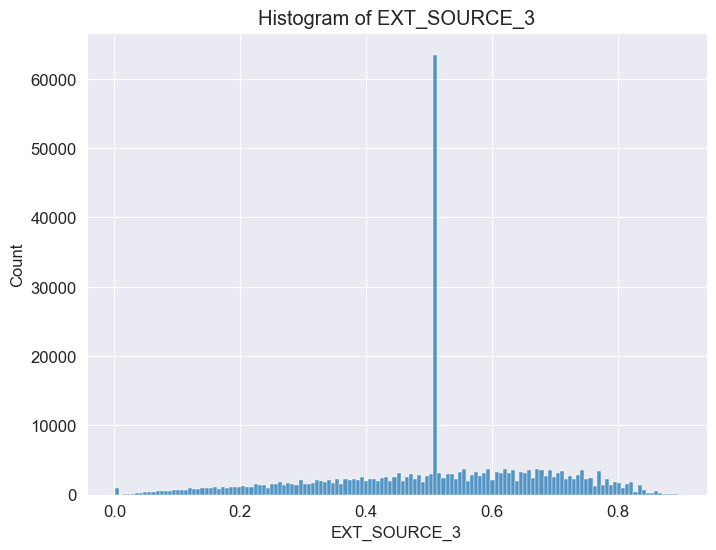

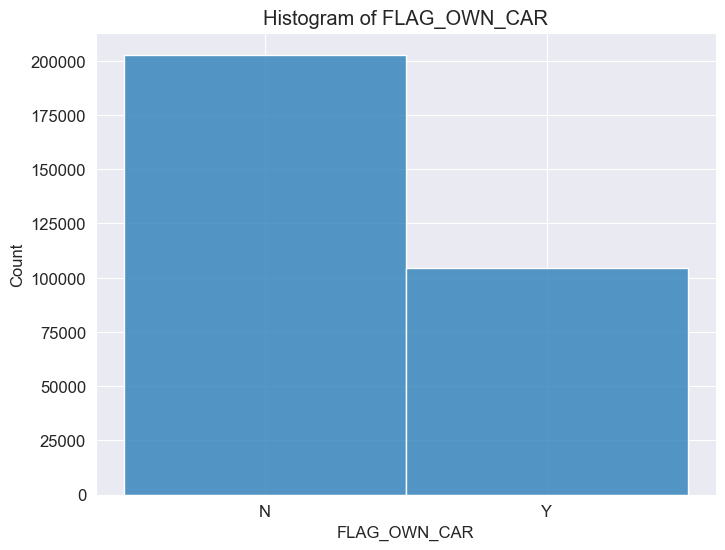

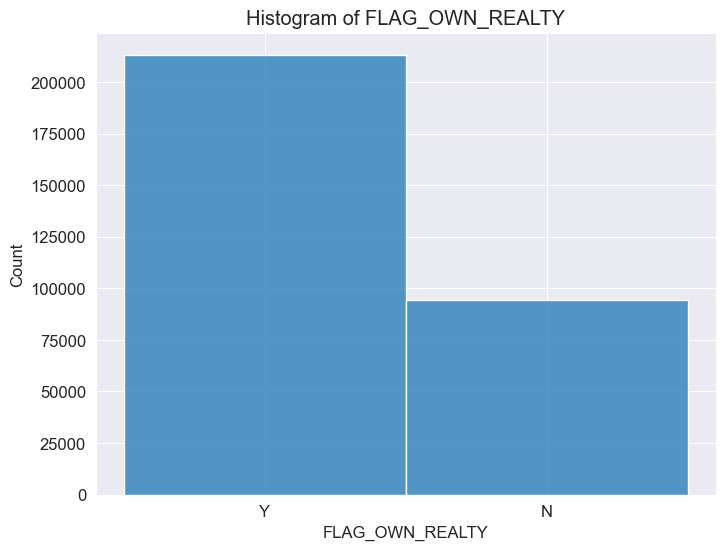

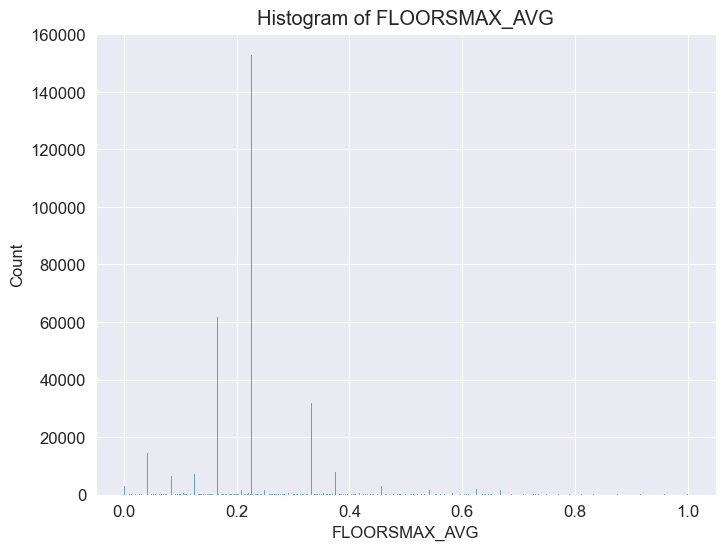

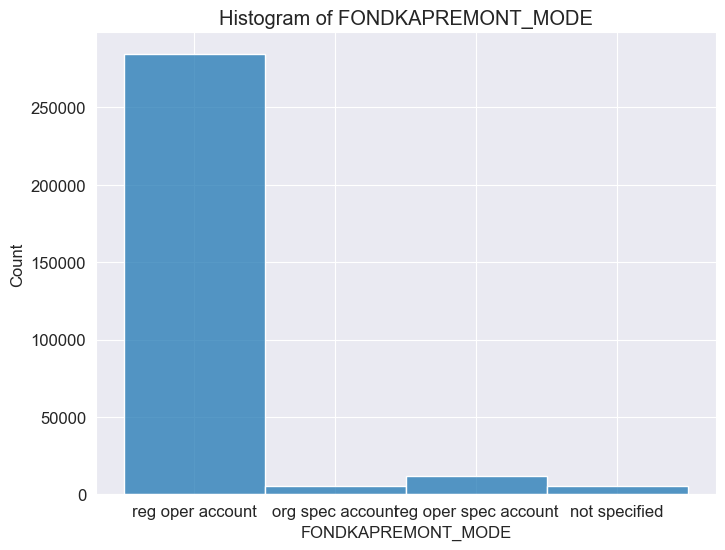

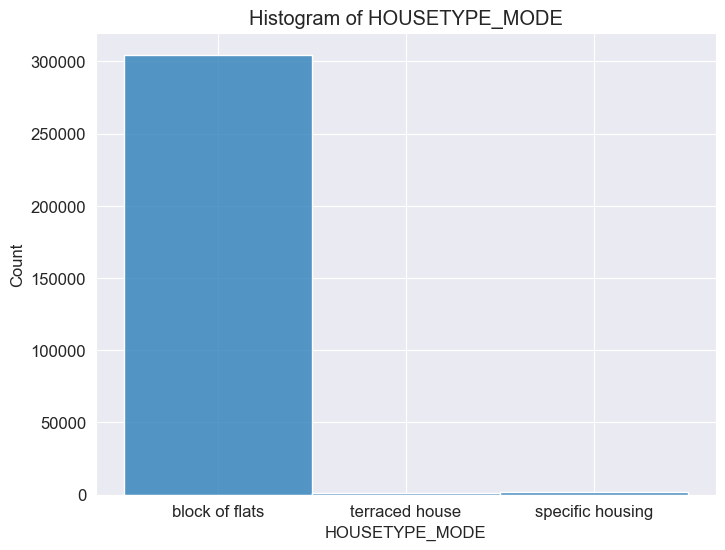

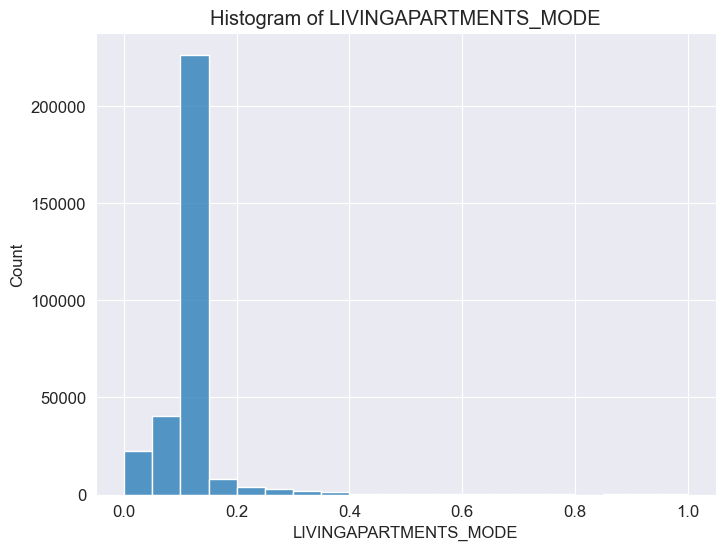

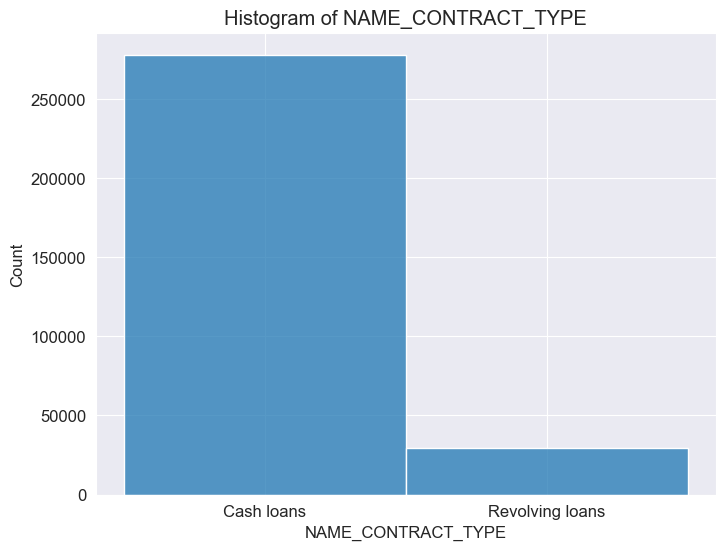

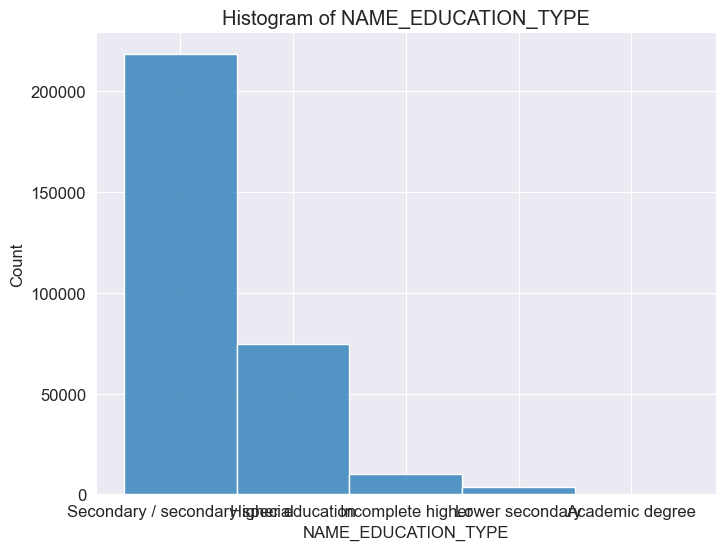

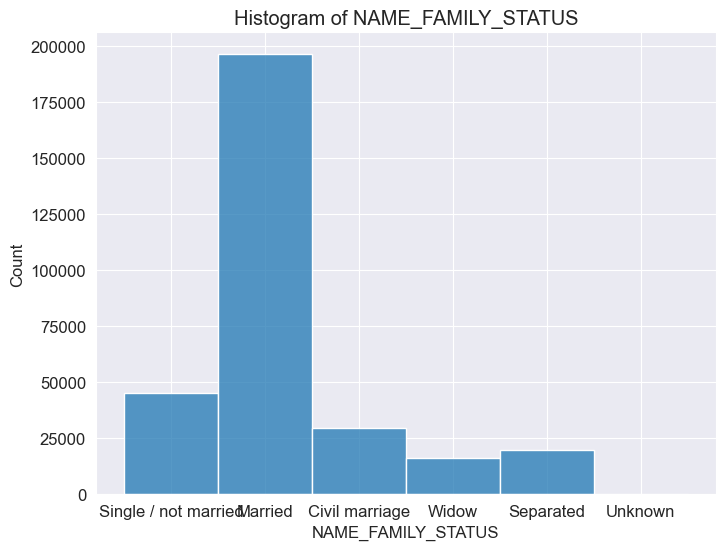

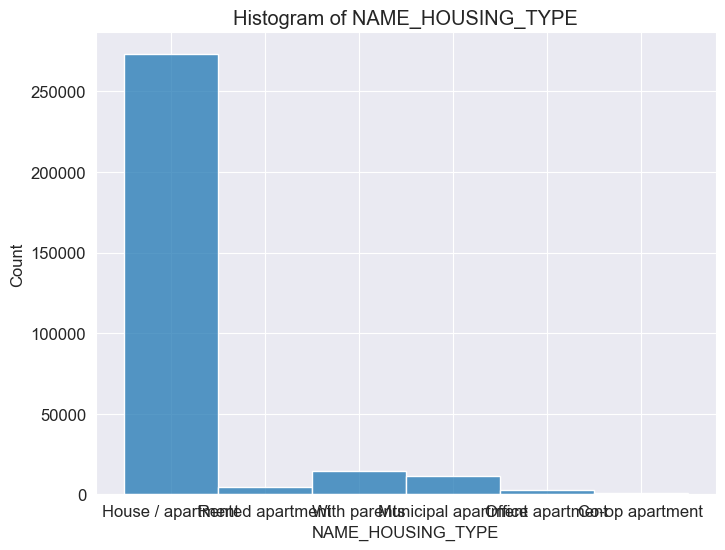

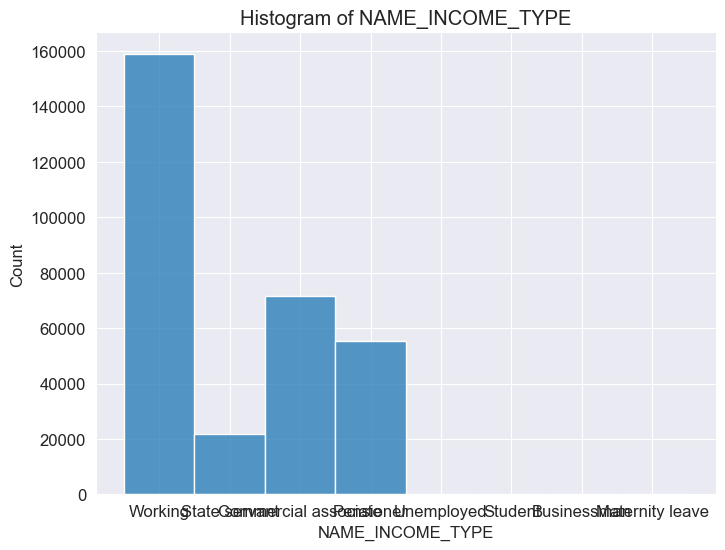

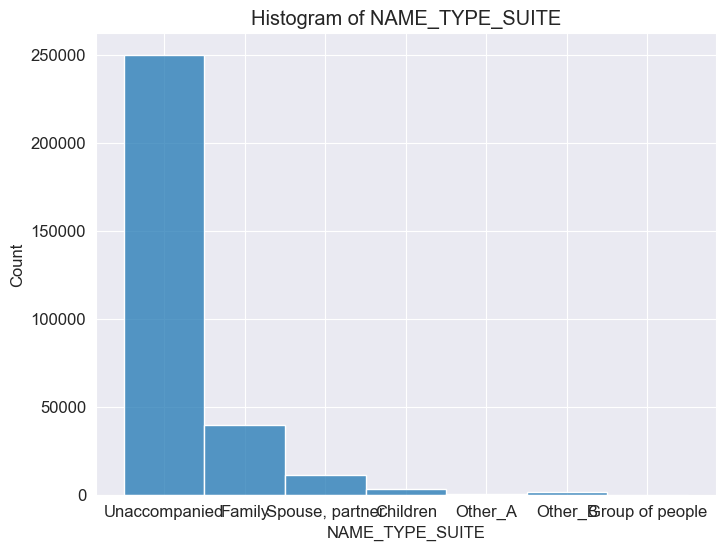

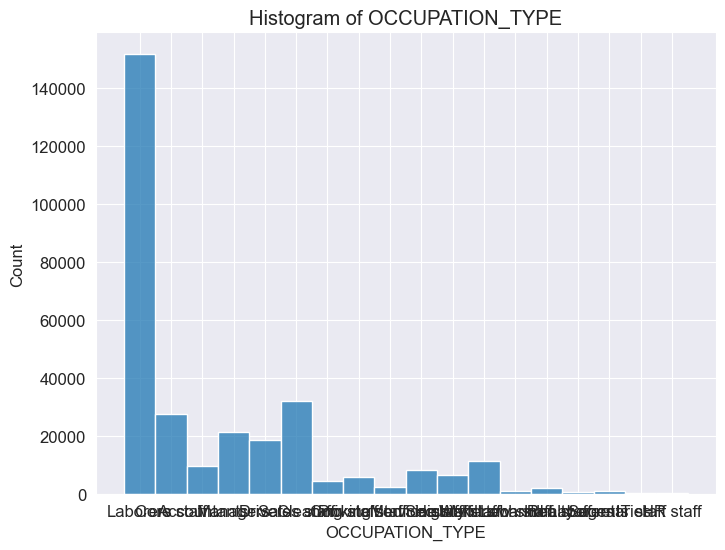

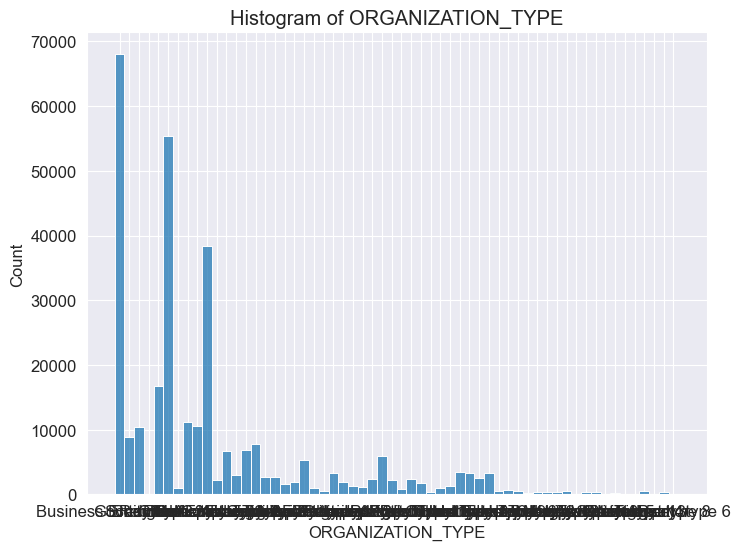

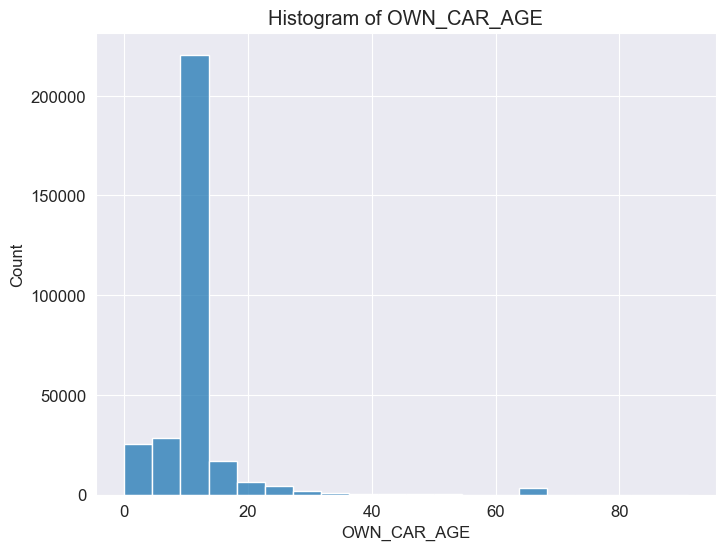

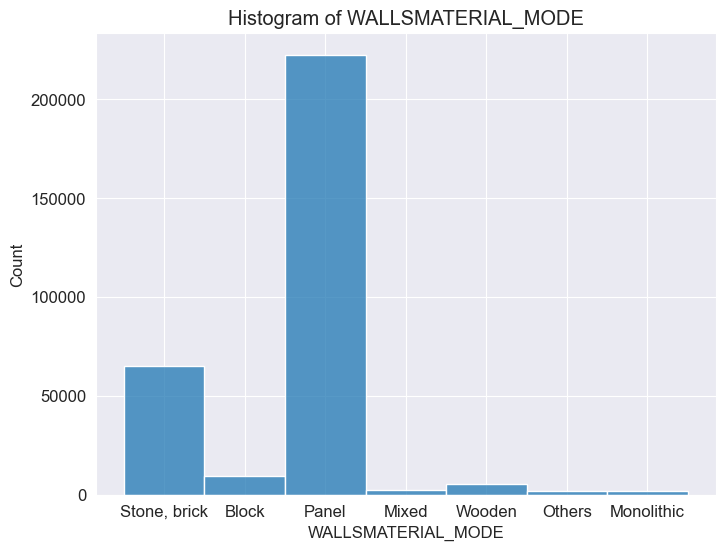

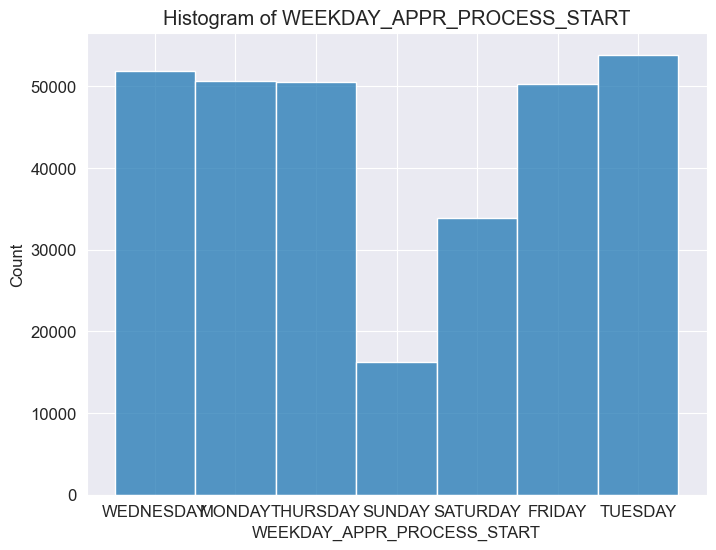

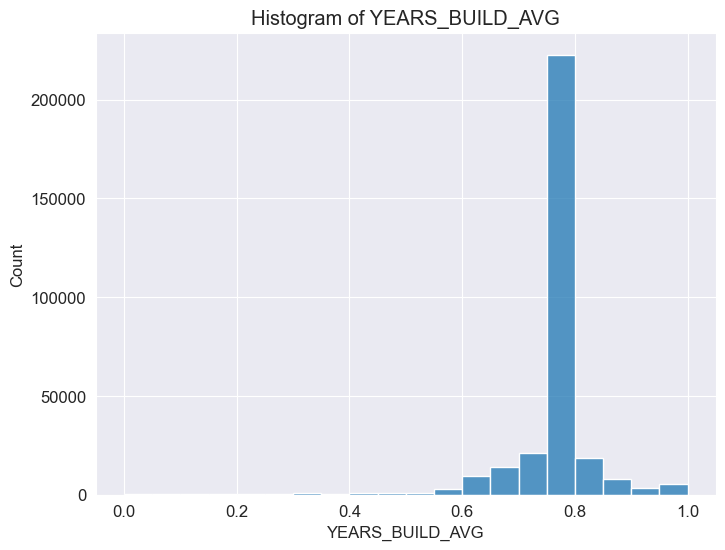

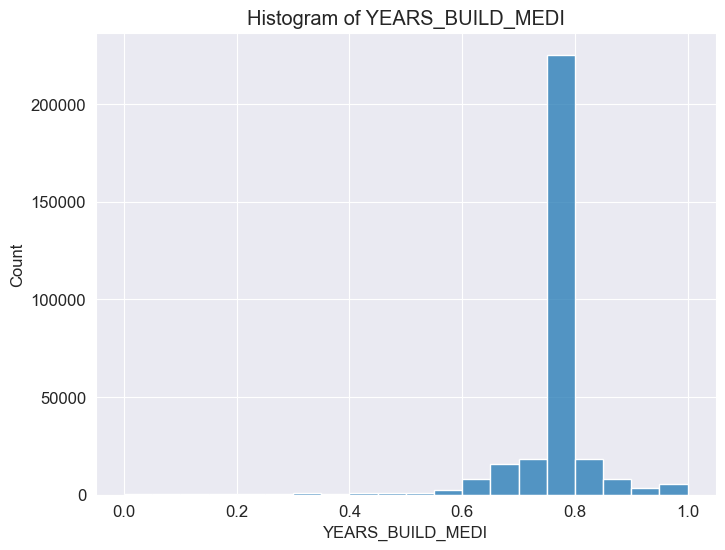

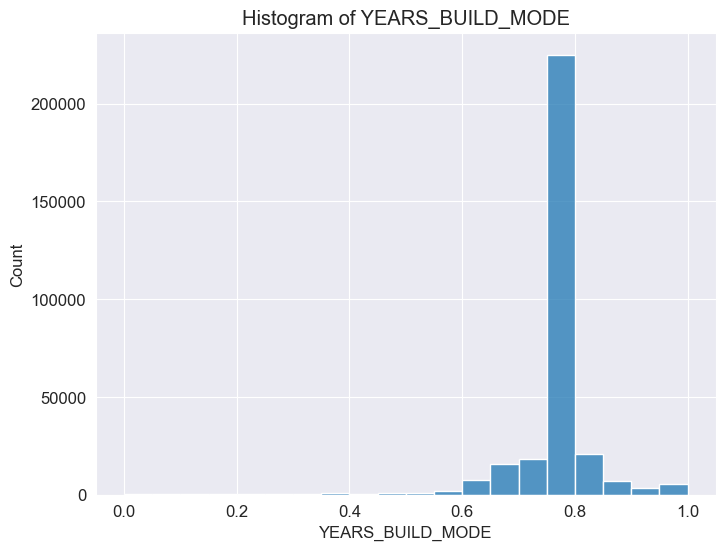

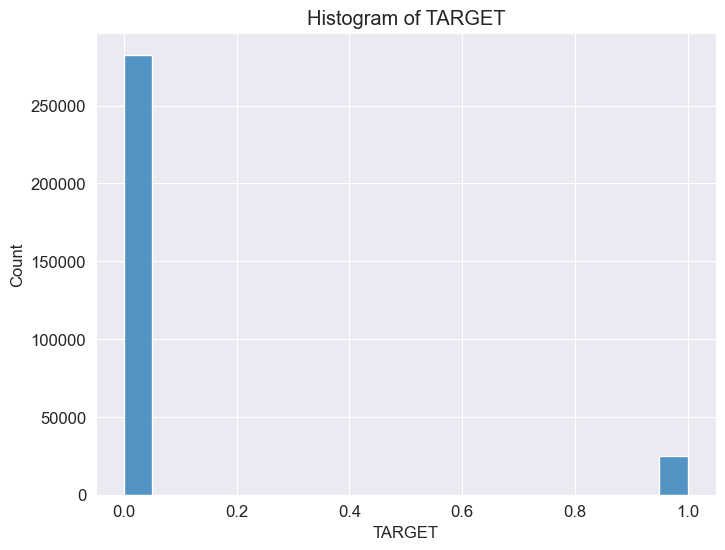

In [1369]:
for column in imp_features:
    plt.figure(figsize=(8, 6))  # Set figure size for each plot
    sns.histplot(data[column])  # Plot histogram for the current column
    plt.title(f"Histogram of {column}")  # Set title of the plot
    plt.xlabel(column)  # Set xlabel
    plt.ylabel('Count')  # Set ylabel
    plt.show()  # Show the plot

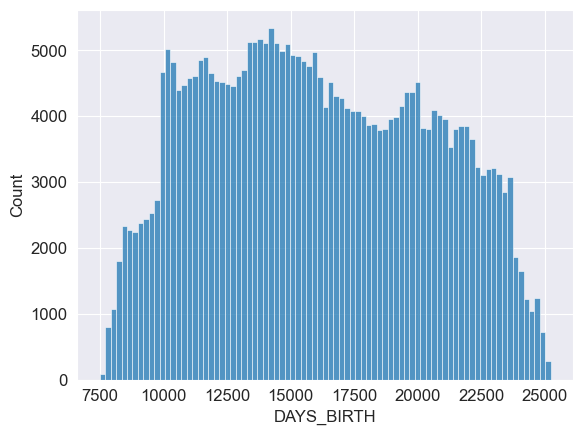

In [1370]:
sns.histplot(data['DAYS_BIRTH']) 
plt.show()

- The distribution shows most of the applicants are having 1000 to 2000 days of birth

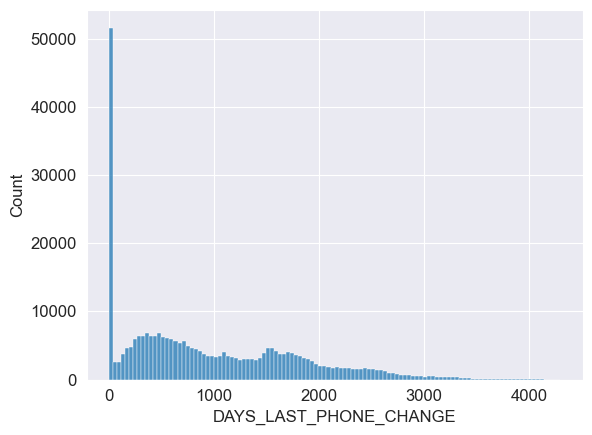

In [1372]:
sns.histplot(data['DAYS_LAST_PHONE_CHANGE']) 
plt.show()

- The distribution shows most of the applicants are having 0 days for last phone change

### Bivariate analysis

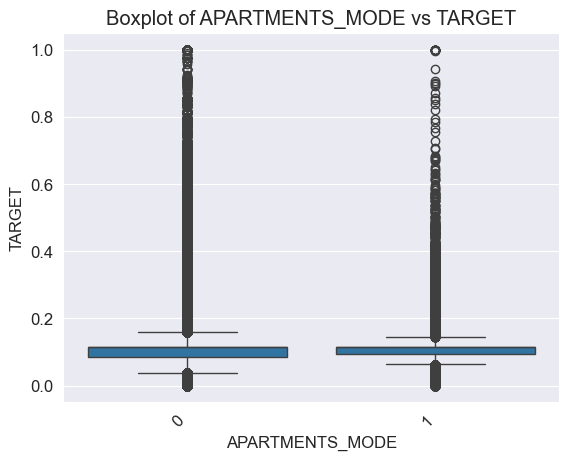

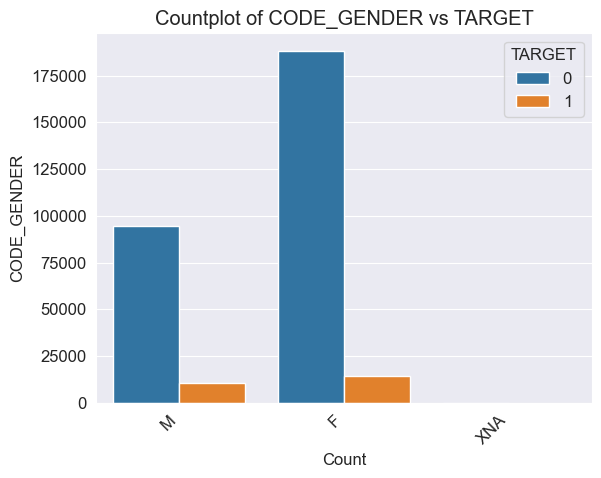

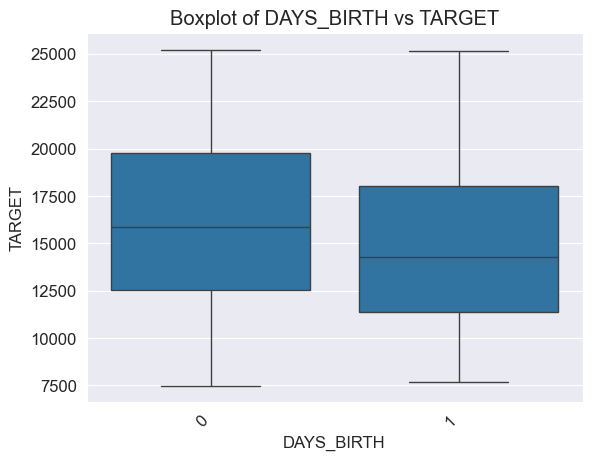

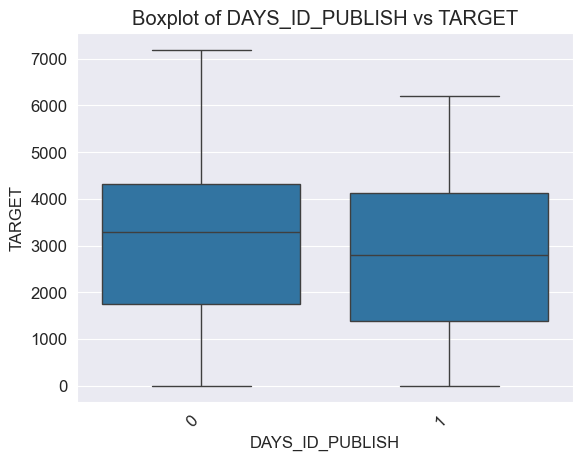

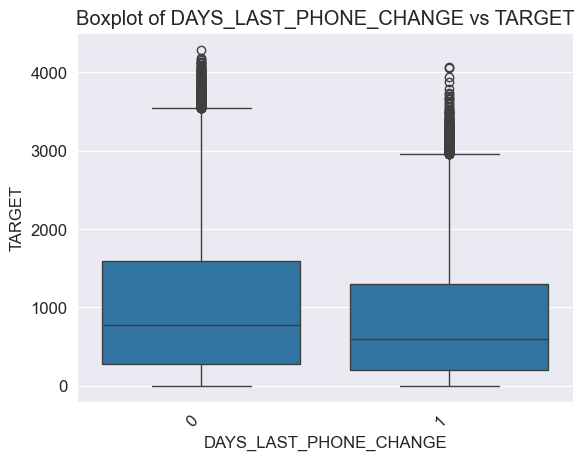

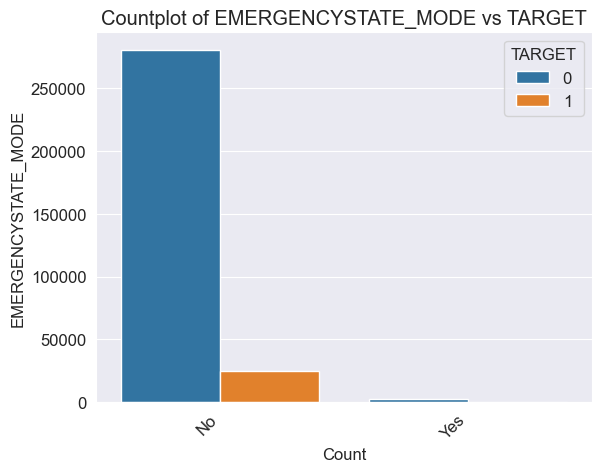

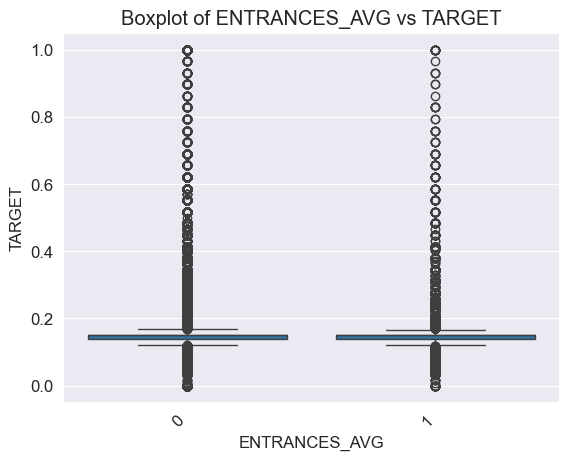

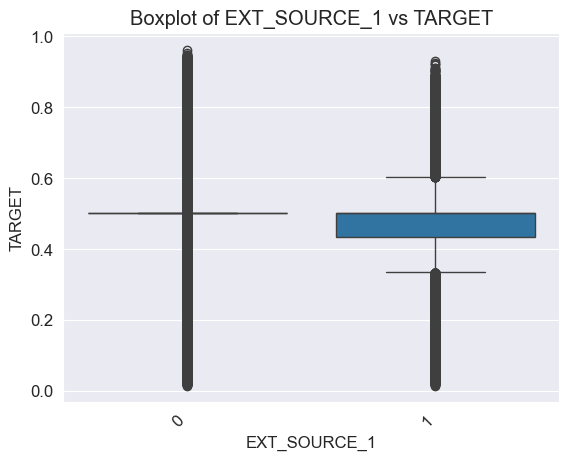

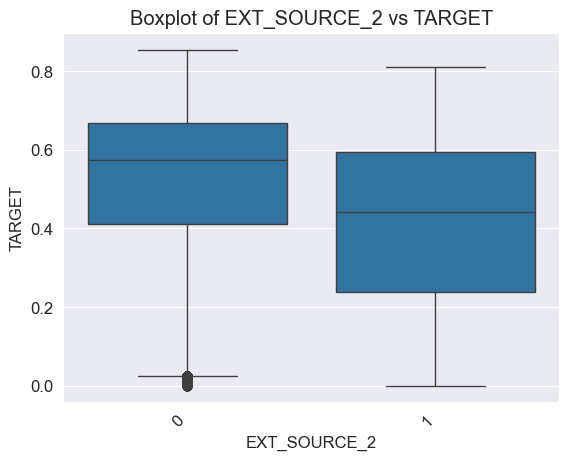

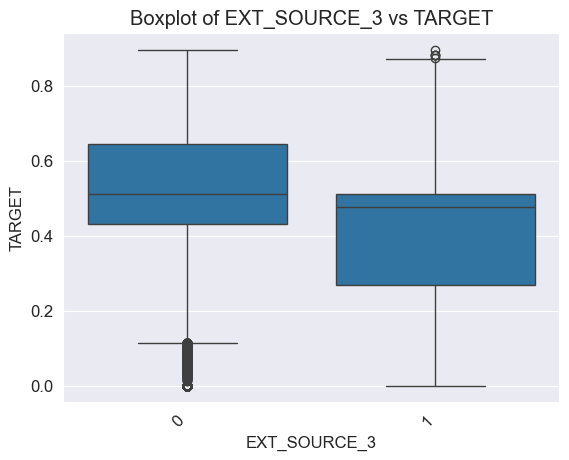

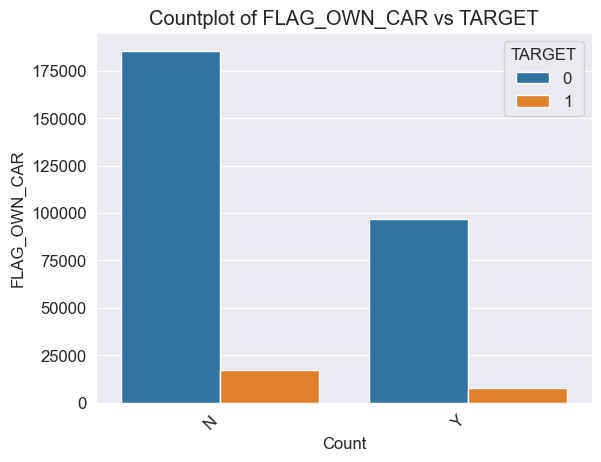

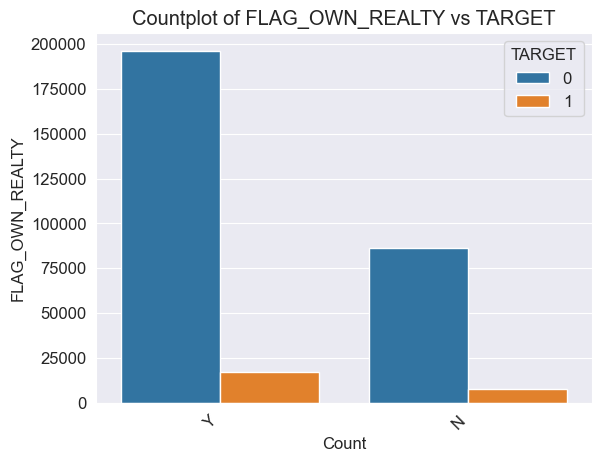

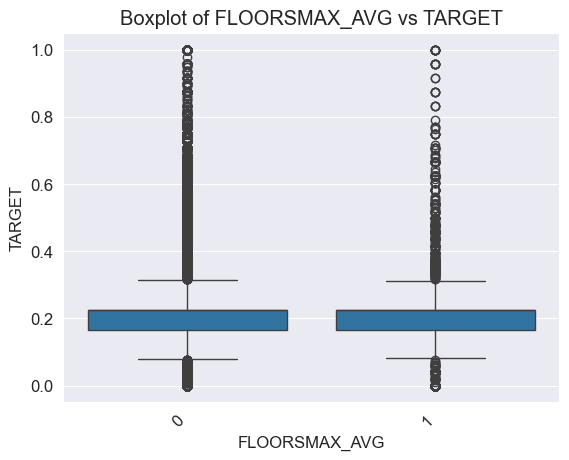

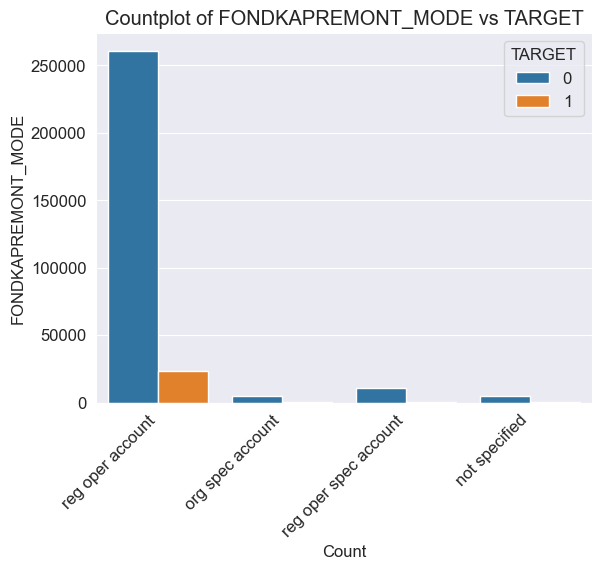

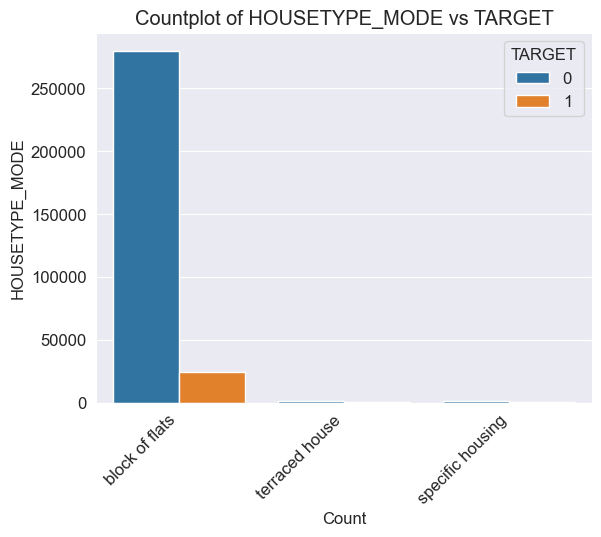

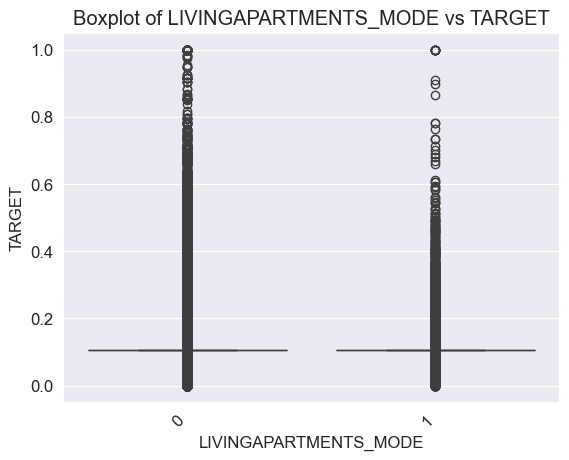

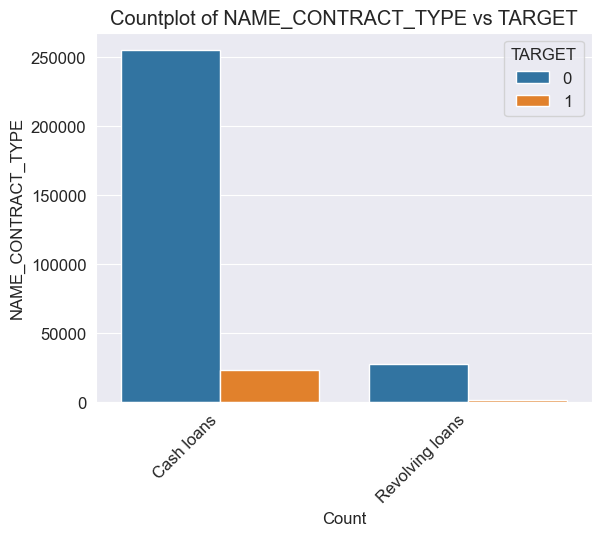

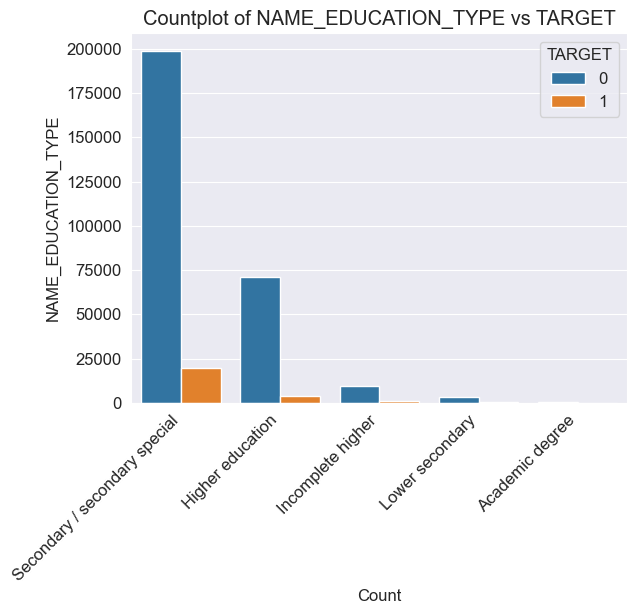

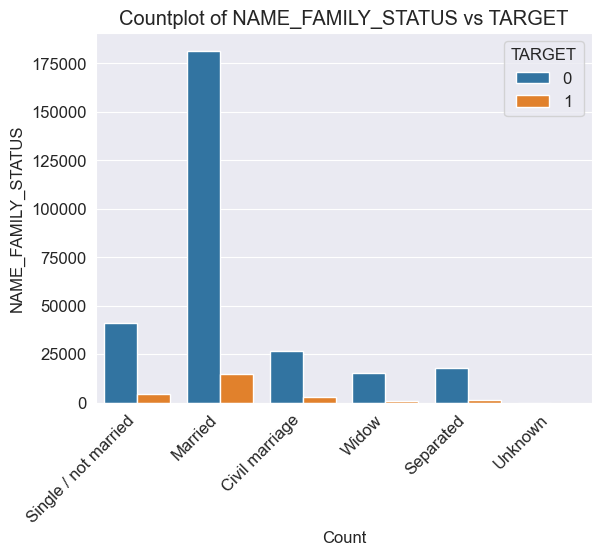

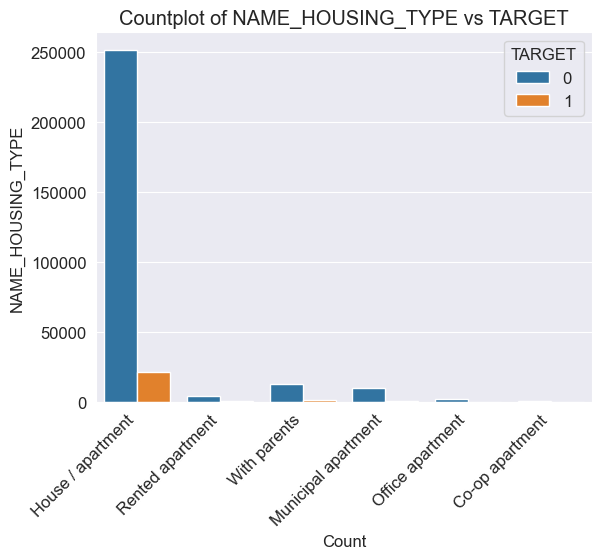

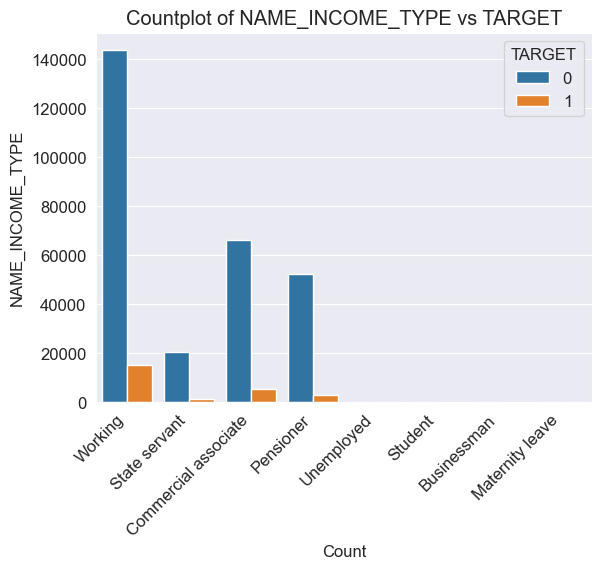

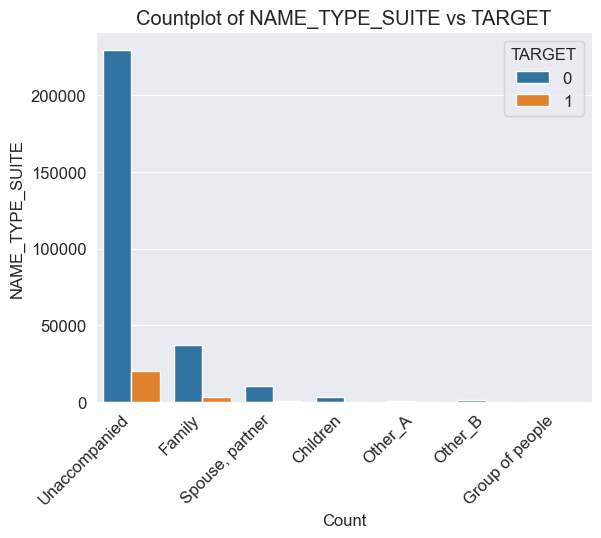

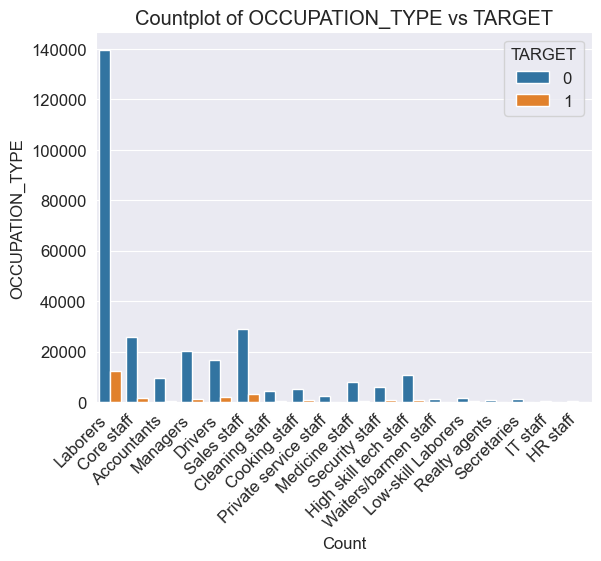

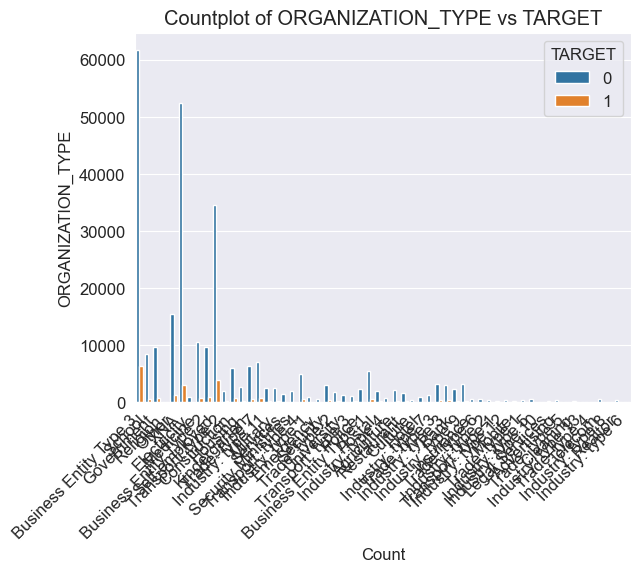

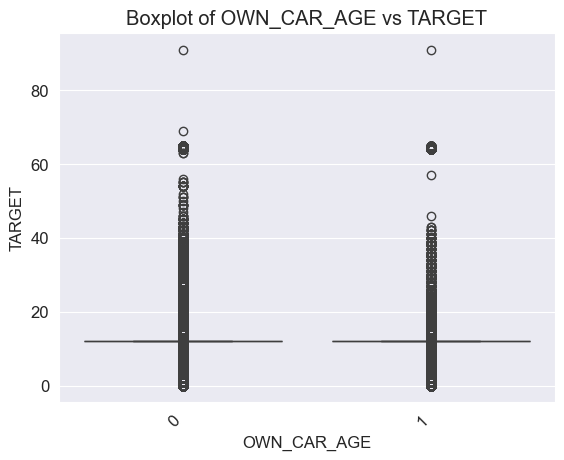

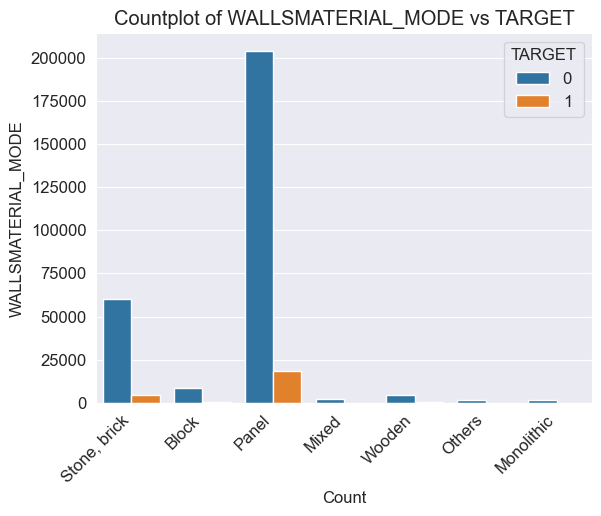

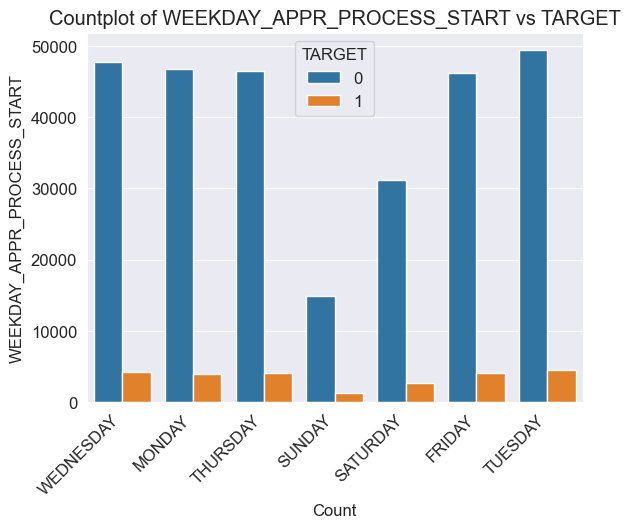

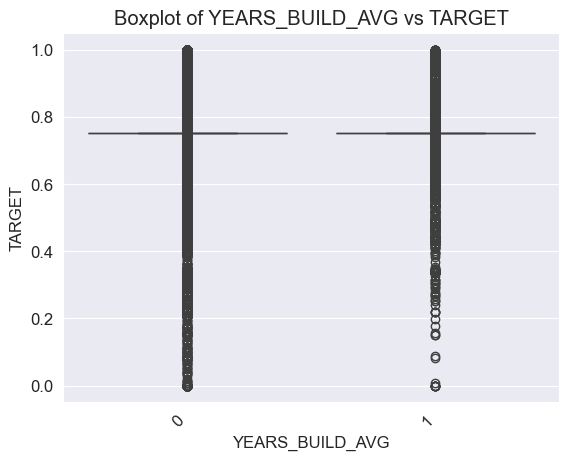

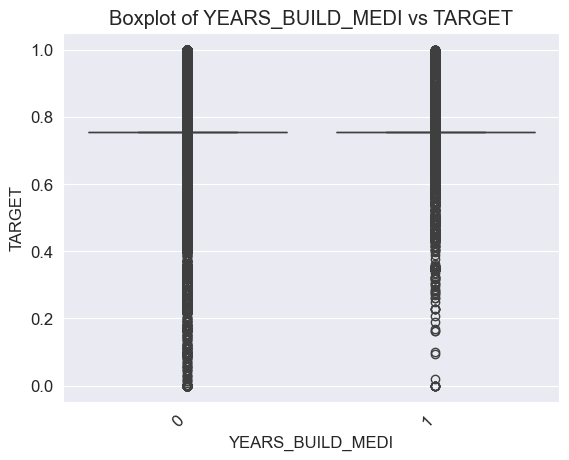

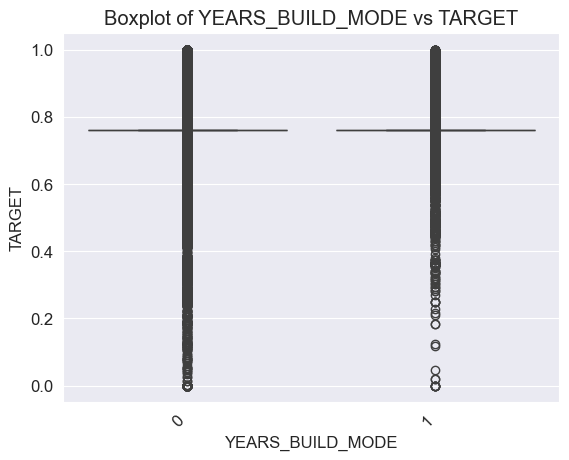

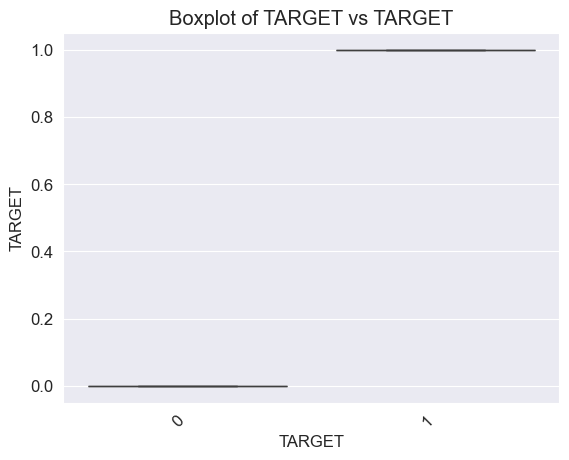

In [1376]:
for column in imp_features: 
    if data[column].dtype in ['int64', 'float64']: 
        sns.boxplot(x='TARGET', y=column, data=data) 
        plt.title(f"Boxplot of {column} vs TARGET")  
        plt.ylabel('TARGET') 
        plt.xlabel(column) 
    else:  
        sns.countplot(x=column, hue='TARGET', data=data) 
        plt.title(f"Countplot of {column} vs TARGET") 
        plt.ylabel(column) 
        plt.xlabel('Count') 
    
    plt.xticks(rotation=45, ha='right')  
    plt.show()  

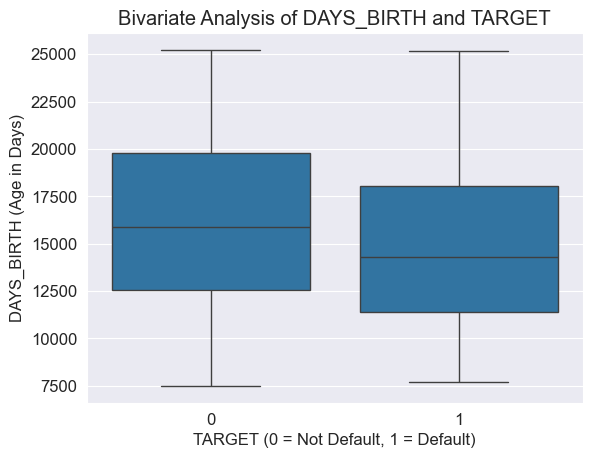

In [1377]:
sns.boxplot(x='TARGET', y='DAYS_BIRTH', data=data)
plt.title('Bivariate Analysis of DAYS_BIRTH and TARGET')
plt.xlabel('TARGET (0 = Not Default, 1 = Default)')
plt.ylabel('DAYS_BIRTH (Age in Days)')
plt.show()

- There are more defaulter median days since birth as 15000(41 years old)

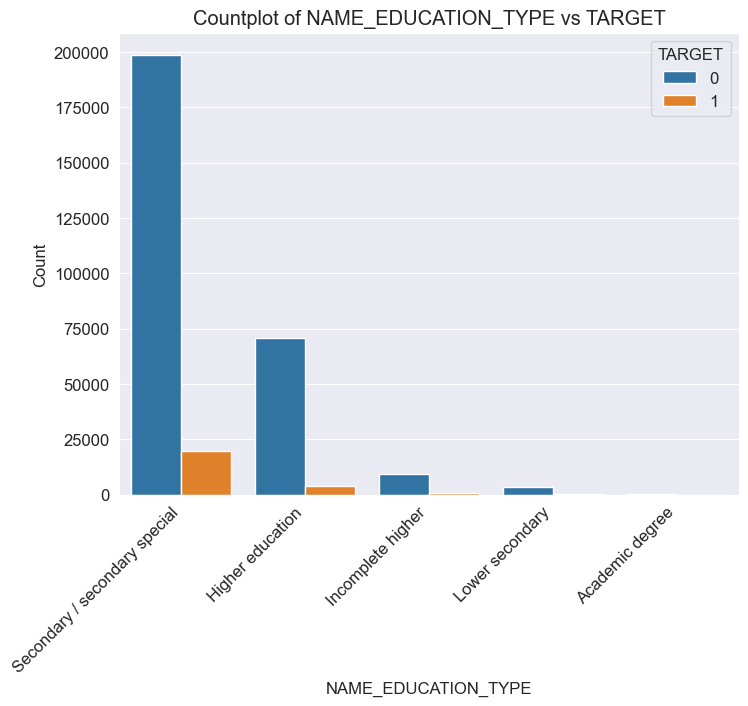

In [1380]:
plt.figure(figsize=(8, 6)) 
sns.countplot(x='NAME_EDUCATION_TYPE', hue='TARGET', data=data)
plt.title('Countplot of NAME_EDUCATION_TYPE vs TARGET') 
plt.xlabel('NAME_EDUCATION_TYPE')  
plt.ylabel('Count')  
plt.xticks(rotation=45, ha='right')  
plt.show() 

- Applicatants are more who completed the secondary education and also defaulters are also more in number

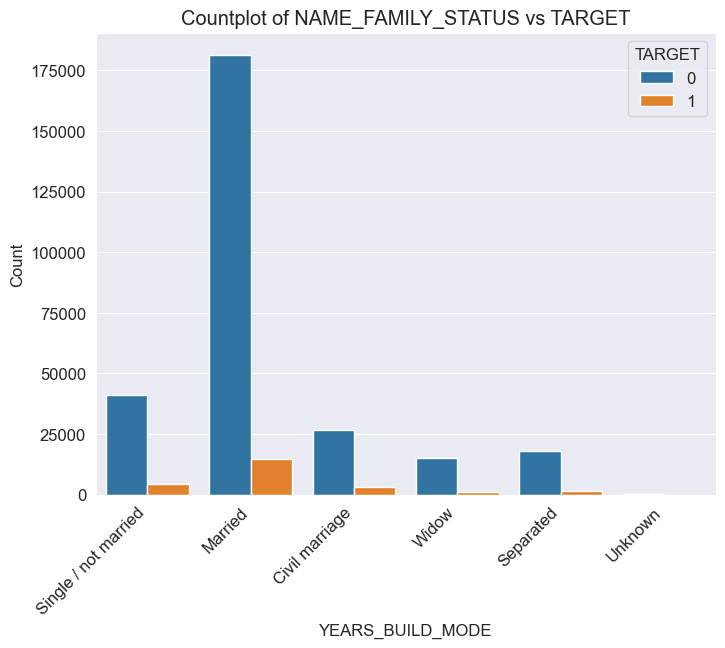

In [93]:
plt.figure(figsize=(8, 6)) 
sns.countplot(x='NAME_FAMILY_STATUS', hue='TARGET', data=data)
plt.title('Countplot of NAME_FAMILY_STATUS vs TARGET') 
plt.xlabel('YEARS_BUILD_MODE')  
plt.ylabel('Count')  
plt.xticks(rotation=45, ha='right')  
plt.show() 

- Most of the applicants are  married compared to other types

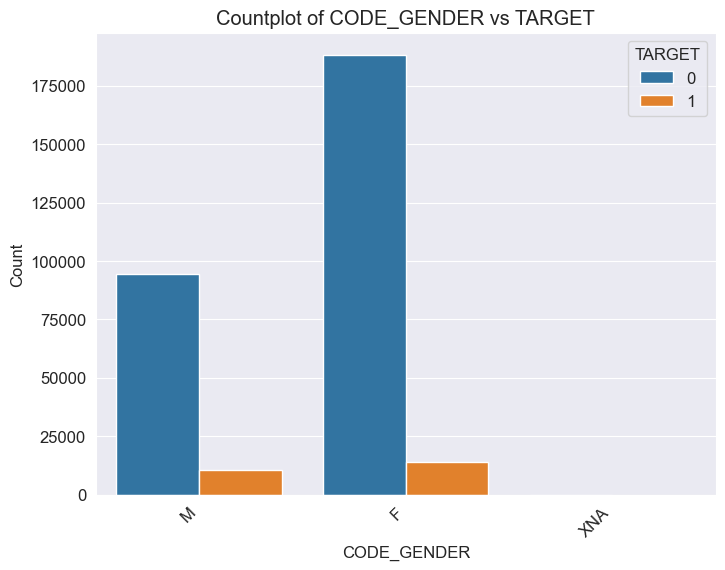

In [95]:
plt.figure(figsize=(8, 6)) 
sns.countplot(x='CODE_GENDER', hue='TARGET', data=data)
plt.title('Countplot of CODE_GENDER vs TARGET') 
plt.xlabel('CODE_GENDER')  
plt.ylabel('Count')  
plt.xticks(rotation=45, ha='right')  
plt.show() 

- The male applicants are less in number but have more defaulters

### Multivariate analysis - correlation

In [98]:
imp_numerical_data = data[imp_features].select_dtypes(include=['float64', 'int64'])
imp_numerical_data.corr()


,APARTMENTS_MODE,DAYS_BIRTH,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,ENTRANCES_AVG,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,FLOORSMAX_AVG,LIVINGAPARTMENTS_MODE,OWN_CAR_AGE,YEARS_BUILD_AVG,YEARS_BUILD_MEDI,YEARS_BUILD_MODE,TARGET
APARTMENTS_MODE,1.000000,-0.003486,0.005017,0.005440,0.601543,0.023532,0.054755,0.003044,0.576419,0.756374,-0.019690,0.268790,0.268122,0.274508,-0.017885
DAYS_BIRTH,-0.003486,1.000000,0.272691,0.082939,0.007262,0.358525,0.091885,0.181252,-0.001160,-0.006628,-0.003052,-0.015451,-0.015579,-0.014999,-0.078239
DAYS_ID_PUBLISH,0.005017,0.272691,1.000000,0.088576,0.010865,0.088240,0.050901,0.116270,0.007276,0.000896,-0.005031,0.004216,0.004042,0.004176,-0.051457
DAYS_LAST_PHONE_CHANGE,0.005440,0.082939,0.088576,1.000000,0.008766,0.088058,0.195569,0.067926,0.005156,0.002182,-0.001502,-0.006949,-0.006857,-0.007020,-0.055218
ENTRANCES_AVG,0.601543,0.007262,0.010865,0.008766,1.000000,0.010886,0.022173,0.007771,0.087670,0.449481,-0.007751,0.073630,0.073042,0.077297,-0.012612
EXT_SOURCE_1,0.023532,0.358525,0.088240,0.088058,0.010886,1.000000,0.135721,0.110606,0.047027,0.016127,-0.033529,0.008129,0.007971,0.007569,-0.099152
EXT_SOURCE_2,0.054755,0.091885,0.050901,0.195569,0.022173,0.135721,1.000000,0.096653,0.093346,0.039185,-0.045448,0.007306,0.007140,0.005711,-0.160303
EXT_SOURCE_3,0.003044,0.181252,0.116270,0.067926,0.007771,0.110606,0.096653,1.000000,0.002219,0.002190,-0.007857,0.008201,0.008048,0.007911,-0.157397
FLOORSMAX_AVG,0.576419,-0.001160,0.007276,0.005156,0.087670,0.047027,0.093346,0.002219,1.000000,0.453992,-0.037123,0.425361,0.424409,0.417060,-0.029145
LIVINGAPARTMENTS_MODE,0.756374,-0.006628,0.000896,0.002182,0.449481,0.016127,0.039185,0.002190,0.453992,1.000000,-0.015560,0.308708,0.307807,0.314924,-0.012234


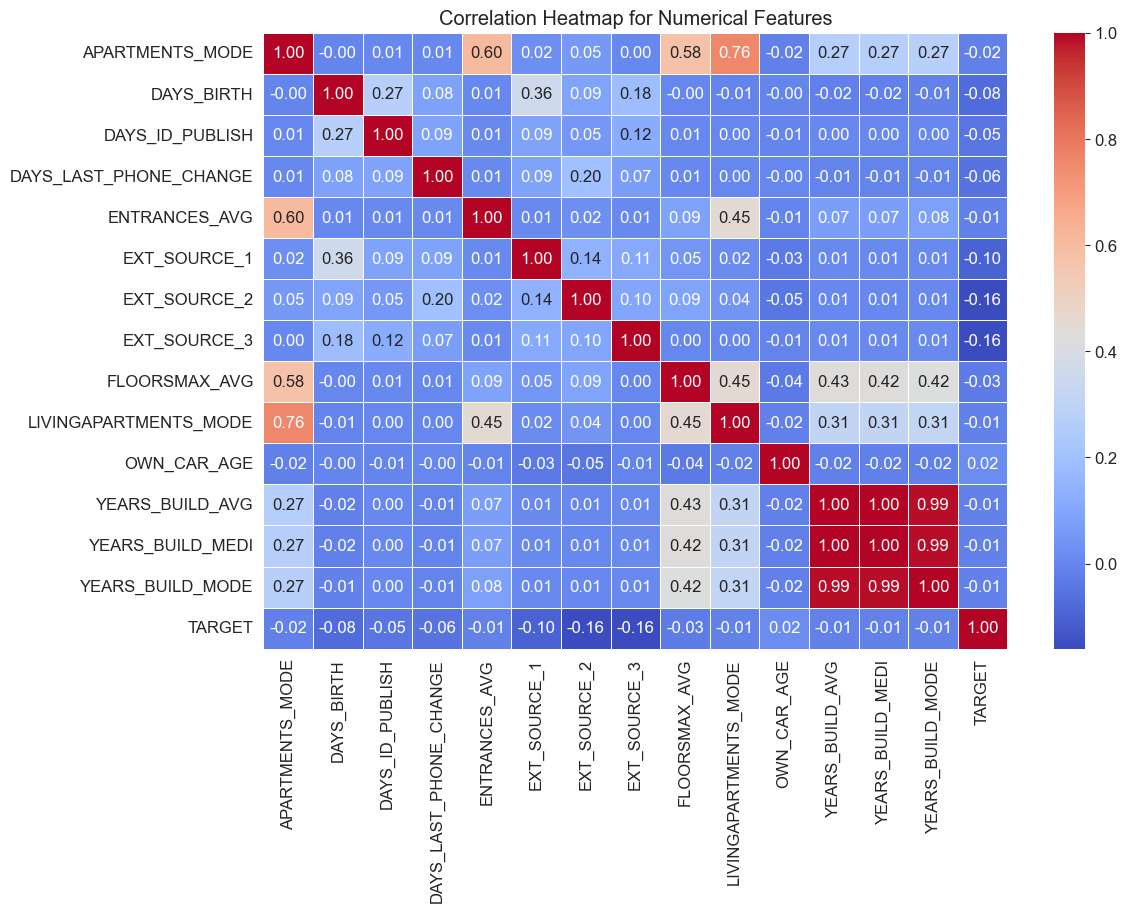

In [99]:
corr_matrix = imp_numerical_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap for Numerical Features')
plt.show()


- Positive Correlations:
    - YEARS_BUILD_AVG with YEARS_BUILD_MEDI (0.99)
    - YEARS_BUILD_AVG with YEARS_BUILD_MODE (0.98)
    - LIVINGAPARTMENTS_MODE with APARTMENTS_MODE (0.75)
    - ENTRANCES_AVG with APARTMENTS_MODE (0.60)
    


- Negative Correlations:
   - EXT_SOURCE_2, EXT_SOURCE_3 and TARGET: (-0.16)
   - DAYS_BIRTH and TARGET: (-0.07)

# Module 2 Assignment - Building a decision tree model


### Feature selection


In [749]:
# Assigning the target variable
target = 'TARGET'
# Dropping the target from X to prevent it from being used as a feature, which could cause overfitting
X = data.drop(columns=[target])
# Assigning the target variable to y for model training
y = data[target]

### Feature engineering


In [751]:
X = pd.get_dummies(X, drop_first=True)

- get_dummies is used for converting categorical variables into a numerical format so that model can understand the numerical terms.
- X contains dummies of categorical features along with the original numerical features

### Splitting a dataset

In [754]:
# splitting the dataset into train(70%) and test(30%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)
[X_train.shape,X_test.shape, y_train.shape, y_test.shape]

[(215257, 229), (92254, 229), (215257,), (92254,)]

- The dataset is split into two parts: the train set, which makes up 70% of the data, and the test set, which comprises 30%, using the sklearn library. The model is trained using the train data and evaluated using the test data.
- The train dataset contains the target variable, which indicates whether the applicant defaults or not, while the test dataset does not include the target variable to avoid data leakage, which could create biased predictions.
- Initially, we build a model on the train dataset. The aim is to test the model's performance on unknown data, i.e., the test dataset, calculate the prediction error (e.g., MAPE), and conclude whether the model is a good fit.
- The advantages of test and train split are:
  - It avoids overfitting.
  - Improves model accuracy and efficiency.
  - Assesses model generalization on unseen data using a separate test set.

### Decision tree

- A decision tree is a type of supervised machine learning used to categorize or make predictions based on how a previous set of questions were answered
- A decision tree is a tree-like structure where the root node represents the starting point, and decision nodes represent questions or splits based on features. Leaf nodes represent the outcomes or consequences of these decisions. Each branch of the tree flows from one decision to another, with leaf nodes at the end representing the predicted class
- Decision trees work with both numerical and categorical data, handle multiple outputs, and assess model reliability. They require less data cleaning compared to other techniques and are easy to explain to non-analytical audiences.
- Decision trees are sensitive to data noise, not ideal for large datasets, and can overvalue certain attributes. They are limited to binary splits at decision nodes, reducing complexity, and can become overly complex with uncertainty and numerous outcomes.

### Build a classification decision tree model


In [759]:
from sklearn.tree import DecisionTreeClassifier # for classification
from sklearn.tree import DecisionTreeRegressor # for regression
dtree = DecisionTreeClassifier(min_samples_leaf = 5, max_depth = 6)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=5)

### Modelling Process

- DecisionTreeClassifier is used for classification tasks where the target variable is categorical
- The DecisionTreeClassifier is imported from sklearn.tree. It is a tree-structured classification algorithm that splits the dataset into subsets based on feature values, helping to classify data based on its features.
- Splits are determined to maximize information gain using measures like Gini impurity or Entropy
- After initialization, the decision tree model is trained using the training data, where X_train represents the features and y_train represents the target labels.

### Visualization

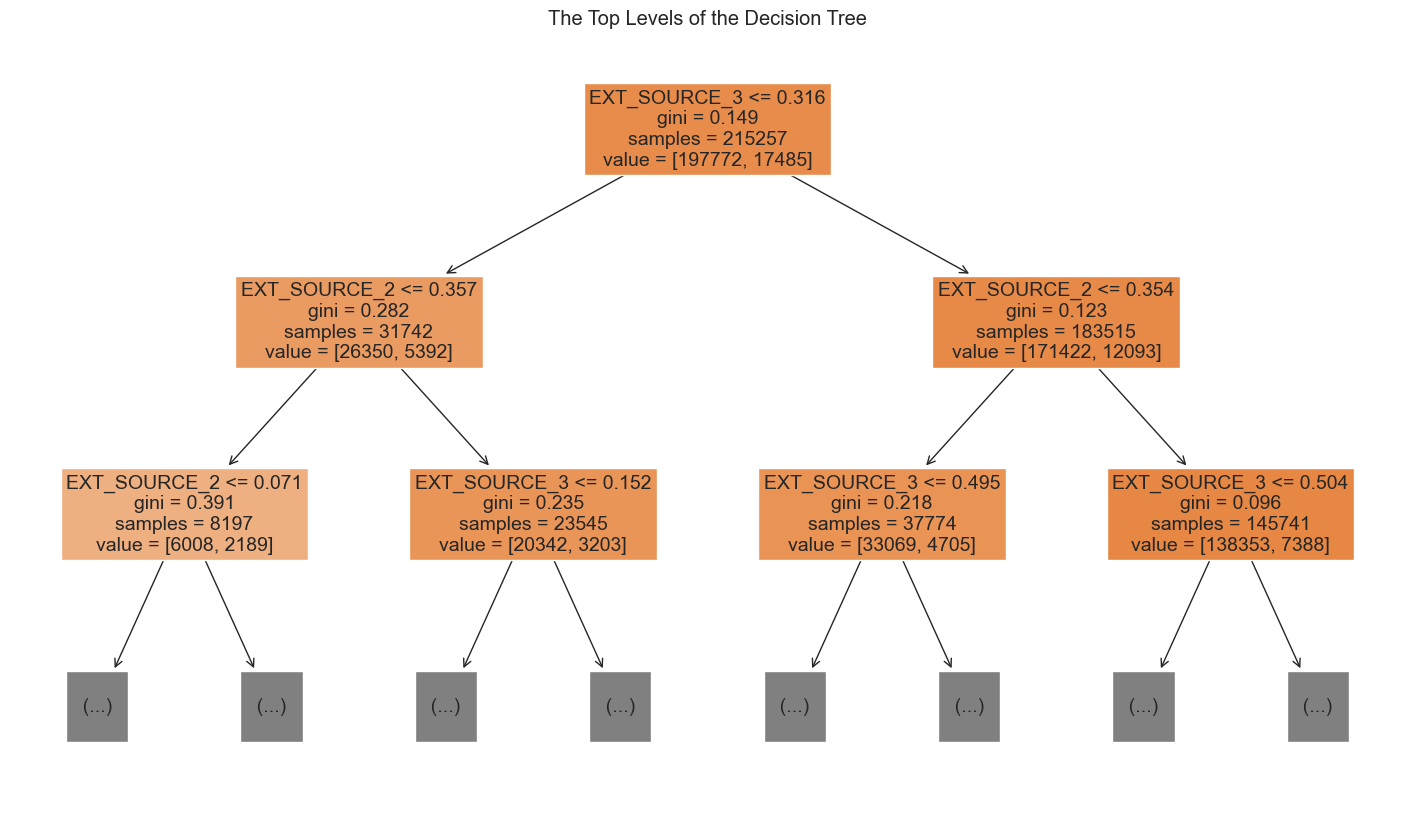

In [763]:
plt.figure(figsize=(18, 10))
plot_tree(dtree, filled=True, max_depth=2, feature_names=X_train.columns, fontsize=14)
plt.title("The Top Levels of the Decision Tree")
plt.show()

### The feature importance chart

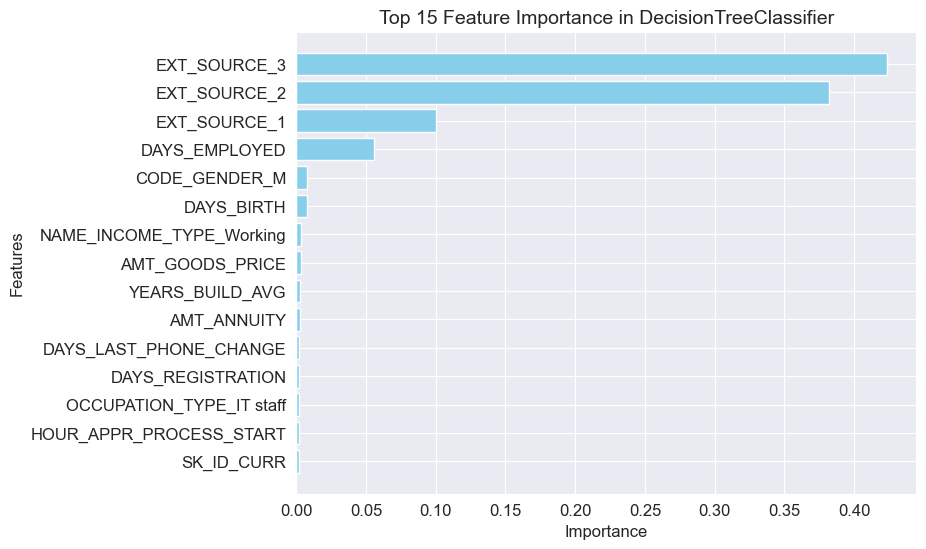

In [765]:
importances = dtree.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Select the top 15 most important features
top_15_features = feature_importance_df.head(15)

# Plot the top 15 most important features
plt.figure(figsize=(8, 6))
plt.barh(top_15_features['Feature'], top_15_features['Importance'], color='skyblue')
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Top 15 Feature Importance in DecisionTreeClassifier', fontsize=14)
plt.gca().invert_yaxis()  # Optional: Show the most important features on top
plt.show()

Feature importance in a Decision Tree model indicates how much each variable influences loan default prediction. Feature importance identifies the most influential variables for predictions, improving model performance and interpretability by focusing on key factors.

- What the Chart Represents:

  - X-Axis: Typically shows the importance score for each feature (ranging from 0 to 1).
  - Y-Axis: Lists the feature names.
Bar Length: Represents the magnitude of the feature's importance.

 - EXT_SOURCE_2 Has more importance of more than 0.07
 - EXT_SOURCE_3 Has importance of 0.05 to 0.06 
 - DAYS_REGISTRATION, SK_ID_CURR, DAYS_ID_PUBLISH Has importance of 0.04 to 0.05

### Prediction

In [768]:
train_pred = dtree.predict(X_train)
test_pred = dtree.predict(X_test)
test_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [769]:
train_proba = dtree.predict_proba(X_train)
test_proba = dtree.predict_proba(X_test)
test_proba

array([[0.67272727, 0.32727273],
       [0.98417496, 0.01582504],
       [0.85416939, 0.14583061],
       ...,
       [0.94906271, 0.05093729],
       [0.97264312, 0.02735688],
       [0.9318947 , 0.0681053 ]])

In [770]:
# To see the order of the classes use: clf.classes_
dtree.classes_

array([0, 1], dtype=int64)

In [771]:
# It predicts P0 and P1. We are interested in P1
test_proba[:,1]

array([0.32727273, 0.01582504, 0.14583061, ..., 0.05093729, 0.02735688,
       0.0681053 ])

# Module 3 Assignment - Various evaluation metrics

## Evaluation metrics

- There is a need to test a model to find out how accurate and effective it is. The evaluation metrics offer a numerical estimate of model performance, which aids in identifying areas of improvement and refining the model to make improved predictions of the target variable. The metrics show how well the model is working, making sure it achieves the desired objectives.

With the understanding and use of evaluation metrics, a model can be improved in several ways:
- Model Choosing: Choosing the best model for the task based on performance metrics.
- Refinement and Diagnosis: Identifying and diagnosing issues in the model, e.g., underfitting or overfitting, and fine-tuning it to improve its predictability.
- Tracking Consistency: Monitoring the model's performance across different datasets and with time to maintain it consistent and reliable.
- Hyperparameter Tuning: Utilizing performance measures to fine-tune hyperparameters for best model performance.
- Understanding Strengths and Weaknesses: Better understanding where the model is robust and where the model can be enhanced, so that better-informed decisions can be made.

### Accuracy

- The accuracy score in model evaluation measures the proportion of correct predictions made by a model out of the total predictions. It is commonly used for classification tasks and is calculated as:
  -  Accuracy = Number of Correct Predictions / Total Number of Predictions
- Accuracy is an extremely indicator of model performance. If a model made accurate predictions, it would have a value of 1, and if it didn’t, it would have a value of 0. Accuracy > 0.9 is a great score, Accuracy > 0.7 is a decent score, Accuracy 0.5 to 0.7 is a mediocre score and Accuracy ≤ 0.5 is Poor performance
- Accuracy can be improved by Feature Engineering, Hyperparameter Tuning, Data Quality, Ensemble Methods, and Cross-validation.
- Accuracy is misleading in imbalanced datasets and does not account for the distribution of true positives, false positives, true negatives, and false negatives.

In [777]:
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, confusion_matrix
print('The training data:',accuracy_score(y_train,train_pred))
print('The test data:',accuracy_score(y_test,test_pred))

The training data: 0.919133872533762
The test data: 0.9197866759164914


- The accuracy score for the training data is 0.9191, which is considered a good score. This indicates that the model has effectively learned the patterns in the training data, with 91.91% of the predictions being correct.

- The accuracy score for the test data is 0.9197, which is also considered a good score. This indicates that the model is correctly predicting the target variable for 92.01% of instances in the test dataset.

Overall, both training and test accuracy scores demonstrate that the model is performing well

### Confusion matrix

- Confusion matrix is also known as error matrix. A confusion matrix is a specific tabular representation used to evaluate the performance of a classification model. It breaks down the predictions into four categories: correct predictions for both classes (true positives and true negatives) and incorrect predictions (false positives and false negatives)

  - True Positive (TP): The model correctly predicted a positive outcome (the actual outcome was positive).
  - True Negative (TN): The model correctly predicted a negative outcome (the actual outcome was negative).
  - False Positive (FP): The model incorrectly predicted a positive outcome (the actual outcome was negative). Also known as a Type I error.
  - False Negative (FN): The model incorrectly predicted a negative outcome (the actual outcome was positive). Also known as a Type II error.

In [781]:
# comparing the actual labels (y_test) with the predicted labels (test_pred)
confusion_matrix(y_test,test_pred)

array([[84733,   181],
       [ 7219,   121]], dtype=int64)

In [782]:
# Formatting
cm = pd.DataFrame(confusion_matrix(y_test,test_pred))
cm.rename(columns={0:'Predicted Negative', 1:'Predicted Positive'},
         index = {0:'Actual Negative',1:'Actual Positive'},inplace=True)
cm

,Predicted Negative,Predicted Positive
Actual Negative,84733,181
Actual Positive,7219,121


In [783]:
# ravel() is used to flatten the matrix (which is a 2x2 array for binary classification) into a 1D array
tn, fp, fn, tp = confusion_matrix(y_test, test_pred).ravel()
tn, fp, fn, tp

(84733, 181, 7219, 121)

- True Negatives - 84733 instances were correctly predicted as the negative class
- False Positives - 181 instances were incorrectly predicted as the positive class, but they actually belong to the negative class
- False Negatives - 7219 instances were incorrectly predicted as the negative class, but they actually belong to the positive class
- True Positives  - 121 instances were correctly predicted as the positive class

Model has a high number of True Negatives (70655), but the False Negatives (6014) are relatively high compared to True Positives (77). This indicates that the model is better at identifying the negative class (TARGET=0) than the positive class (TARGET=1)


In [786]:
data[target].value_counts()


TARGET
0    282686
1     24825
Name: count, dtype: int64

- Since the dataset is highly imbalanced with significantly more negative examples than positive examples, the model is skewed towards predicting the majority class (TARGET=0). The imbalance encourages the model to prefer to predict the negative class, which reduces the prediction accuracy for the positive class (TARGET=1).
- To improve the confusion matrix, reduce False Negatives (FN) and maximize True Positives (TP) through adjustment of decision threshold, data quality, class imbalance management, and usage of stronger models like Gradient Boosting.

### ROC Curve

- ROC curve is a graphic display of model performance across all thresholds. ROC curves are graphs of classifiers' performance by measuring true positive rate against false positive rate. The area under ROC curve (AUC) measures the performance of machine learning algorithms
- They receive a score to contrast the ROC curve of a group of classifiers by comparison based on an estimation of the area under the ROC curve, or AUC, or ROCAUC. The score is 0.0 through 1.0, where 1.0 represents a perfect classifier.
- An AUC of 1 is an ideal model, 0.5 is guessing randomly, and less than 0.5 is poorer than random.

#### ROC curve by hand
-  ROC curve by hand is used to compute the False Positive Rate (FPR), True Positive Rate (TPR), and thresholds for a binary classification model's predictions, typically for plotting the ROC curve.

In [791]:
roc_auc_value = roc_auc_score(y_test,test_pred)
roc_auc_value

0.5071767226067933

- The ROC AUC score is 0.50, which is  above 0.5, indicating that the model's performance is better than random guessing.
- This suggests that the model has limited discriminatory power and may need further improvements to effectively distinguish between the classes.

#### Common mistake in ROC
- A common mistake in ROC curve plotting is using binary predictions from .predict() instead of probability predictions from .predict_proba(). Using .predict() can lead to a kinked ROC curve, as it compares the probabilities to 0.50 to produce binary outcomes

In [794]:
# It predicts P0 and P1. We are interested in P1
fpr, tpr, _ = roc_curve(y_test, test_proba[:,1])
[fpr,tpr]

[array([0.00000000e+00, 8.24363474e-05, 9.42129684e-05, 1.64872695e-04,
        1.42497115e-03, 1.57806722e-03, 2.13156841e-03, 2.33177097e-03,
        2.39065407e-03, 2.49664366e-03, 8.96200862e-03, 9.04444497e-03,
        1.09051511e-02, 1.10700238e-02, 1.44734673e-02, 1.46147867e-02,
        2.61205455e-02, 2.61440987e-02, 2.74866335e-02, 2.96535318e-02,
        3.09842900e-02, 3.15024613e-02, 3.18086535e-02, 3.20441859e-02,
        4.09119815e-02, 5.18053560e-02, 5.33009869e-02, 5.34776362e-02,
        5.53501189e-02, 8.25658902e-02, 8.98202888e-02, 9.03384601e-02,
        9.85703182e-02, 1.31709730e-01, 1.34500789e-01, 1.43345031e-01,
        1.50140142e-01, 1.52978307e-01, 2.14216737e-01, 2.17832160e-01,
        2.18526980e-01, 2.22118850e-01, 2.47521021e-01, 2.47685894e-01,
        2.72899640e-01, 2.79753633e-01, 2.94403750e-01, 3.01611042e-01,
        3.22973832e-01, 3.29651176e-01, 3.76416139e-01, 4.07671291e-01,
        4.25477542e-01, 5.55291236e-01, 6.50128365e-01, 6.823727

- The above output shows how the model's true positive and false positive rates change with different thresholds(0 to 1). As the threshold increases, the model predicts fewer positives, reducing both false and true positives.

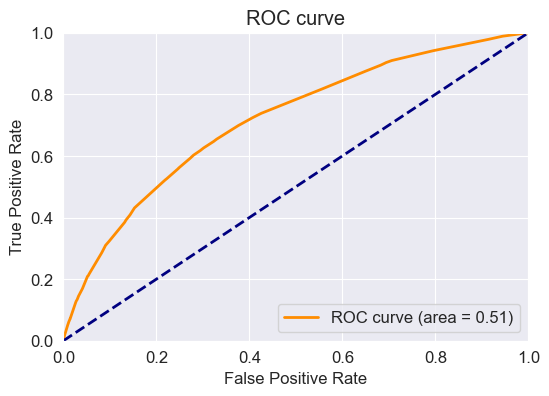

In [796]:
def plot_roc(y_true,y_prob):
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    lw=2
    plt.figure(figsize=(6,4))
    plt.plot(fpr,tpr, color='darkorange',lw=lw,label='ROC curve (area = %0.2f)' %roc_auc_value)
    plt.plot([0,1],[0,1], color='navy',lw=lw,linestyle='--')
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.legend(loc='lower right')
    plt.show()
    
plot_roc(y_test, test_proba[:,1])

- The orange curve shows the model's performance, with a higher area under the curve (AUC) indicating better distinction between classes.
- The blue dotted line represents random guessing, and if the orange curve is above it, the model performs better than random.
  
As the Roc is 0.51 there is less area under orange curve indicating the model is performing better than random.

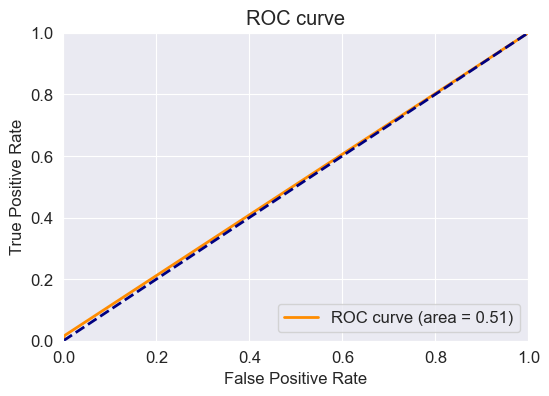

In [798]:
#The graph plots the ROC curve using the predicted class labels (test_pred) instead of probabilities.
plot_roc(y_test, test_pred)


- The overlapping of two lines in the ROC curve typically indicates that the model's predictions for the positive class (1) are not varying enough across different thresholds, possibly due to poor differentiation between the classes

### Gains table

- The Gains table evaluates model performance by dividing data into deciles based on predicted probabilities. It tracks the number of actual positives, cumulative positives, and the percentage of positives captured in each group.
- It helps in Clear Model Evaluation, ROI Analysis and Improved Decision-Making

In [802]:
df_prep = pd.DataFrame(columns = ['actual','pred'])
df_prep['actual'] = y_test
df_prep['pred'] =test_pred
df_prep = df_prep.sort_values(by='pred',ascending=False)
df_prep['row_id'] = range(0,0+len(df_prep))
df_prep.head()

,actual,pred,row_id
144640,0,1,0
57081,0,1,1
14821,0,1,2
1914,0,1,3
217804,0,1,4


- The actual values for these rows are both 0 and 1, so the model is likely to be misclassifying some of the examples, particularly those with actual target value 0. This outcome suggests the model may be biased towards predicting the positive class, and further tuning or testing would be required to improve classification performance.

In [804]:
df_prep['decile'] = (df_prep['row_id'] / (len(df_prep)/10)).astype(int)
df_prep.loc[df_prep['decile'] == 10] =9
df_prep['decile'].value_counts()

decile
0    9226
2    9226
5    9226
7    9226
1    9225
3    9225
4    9225
6    9225
8    9225
9    9225
Name: count, dtype: int64

- Above code splits the sorted data into 10 deciles, with each decile containing around 9226 rows

In [806]:
# Create gains table
gains = df_prep.groupby('decile')['actual'].agg(['count','sum'])
gains.columns = ['count','actual']
gains

,count,actual
decile,,
0,9226,834
1,9225,701
2,9226,734
3,9225,738
4,9225,737
5,9226,739
6,9225,703
7,9226,699
8,9225,697


- The table shows the number of records in each decile (approximately 9226), with the sum indicating the count of positive instances (TARGET = 1) in each decile
- In decile 0, the count of records is 9226, with 834 positive instances and 8392 negative instances.

In [808]:
# table
gains['non_actual'] = gains['count'] - gains['actual']
gains['cum_count'] = gains['count'].cumsum()
gains['cum_actual'] = gains['actual'].cumsum()
gains['cum_non_actual'] = gains['non_actual'].cumsum()
gains['percent_cum_actual'] = (gains['cum_actual'] / np.max(gains['cum_actual'])).round(2)
gains['percent_cum_non_actual'] = (gains['cum_non_actual'] / np.max(gains['cum_non_actual'])).round(2)
gains['if_random'] = np.max(gains['cum_actual']) /10
gains['if_random'] = gains['if_random'].cumsum()
gains['lift'] = (gains['cum_actual'] / gains['if_random']).round(2)
gains['K_S'] = np.abs( gains['percent_cum_actual'] - gains['percent_cum_non_actual']  ) * 100 
gains['gain'] = (gains['cum_actual'] / gains['cum_count']*100).round(2)
gains

,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,9226,834,8392,9226,834,8392,0.11,0.1,734.0,1.14,1.0,9.04
1,9225,701,8524,18451,1535,16916,0.21,0.2,1468.0,1.05,1.0,8.32
2,9226,734,8492,27677,2269,25408,0.31,0.3,2202.0,1.03,1.0,8.20
3,9225,738,8487,36902,3007,33895,0.41,0.4,2936.0,1.02,1.0,8.15
4,9225,737,8488,46127,3744,42383,0.51,0.5,3670.0,1.02,1.0,8.12
5,9226,739,8487,55353,4483,50870,0.61,0.6,4404.0,1.02,1.0,8.10
6,9225,703,8522,64578,5186,59392,0.71,0.7,5138.0,1.01,1.0,8.03
7,9226,699,8527,73804,5885,67919,0.80,0.8,5872.0,1.00,0.0,7.97
8,9225,697,8528,83029,6582,76447,0.90,0.9,6606.0,1.00,0.0,7.93


- count : Total count of rows in each decile
- actual : Count of positive instances (Target =1)
- non_actual : Count of negative instances(Target =0),which is count - actual
- cum_count : cumulative sums of the counts across decile
- cum_non_actual: cumulative sums of the non_actual across decile
- percent_cum_actual: cumulative percentage of actual instances across decile
- percent_cum_non_actual: cumulative percentage of non_actual instances across decile
- if_random : represents how a random model would perform, i.e., it assumes an even distribution between actual positives and negatives
- lift : Lift is a measure of how much better the model is at capturing positive instances compared to a random model
- K_S : K-S statistic measures the maximum difference between the cumulative percentage of actual positive instances and the cumulative percentage of non-actual (negative) instances.
- gain : Gain shows the percentage of actual positive instances captured by the model through the deciles



Observations
- The actual case are greater for top decile(0) than bottom decile
- if_random declines at decile 0 and steadily rise means the best performance of the model occurs in the higher deciles and lower deciles are more difficult to identify.
- K_S, lift also high at top decile indicating model performs best at top deciles, it indicates the model performance starts to deteriorate as we go down
- Max gain occurs at decile 0 and gradually decreasing, indicating that model is improving to spot positive instances in the leading decile

### Cumulative lift curve

- cumulative lift curve is a visual representation that shows how much better a predictive model performs compared to a random guess
- It is calculated as the ratio between the results obtained with and without the model

<Axes: xlabel='decile'>

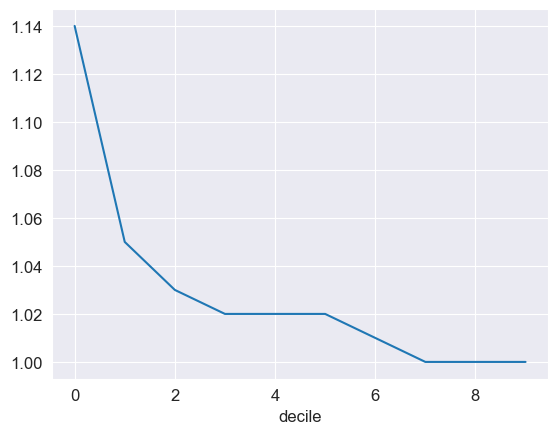

In [813]:
# The cumulative lift curve
gains['lift'].plot.line()

- The above graph created using a line plot of total lift for each decile from the gains DataFrame
  - x-axis (Deciles): The x-axis is for the deciles
  - y-axis (Lift Value): y-axis is the lift value per decile
- The plot shows the model does well at the higher decile and is performance decreasing slowly afterwards(not capturing most of the positive cases in the later deciles)

### Komogorov-Smirnov (K-S)

- Kolmogorov-Smirnov (K-S) statistic is used to compare two distributions to determine if they are pulling from the same underlying distribution
- It is usually used to check the uniformity of random numbers
- A higher K-S value indicates better model performance, with greater distinction between the two classes.

<Axes: xlabel='decile'>

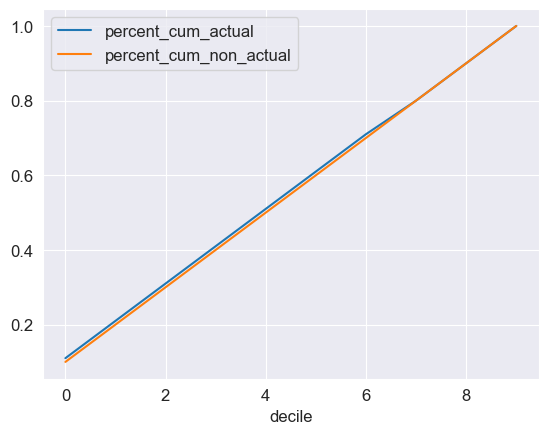

In [817]:
gains[['percent_cum_actual','percent_cum_non_actual']].plot.line()


- The x-axis represents the deciles and  y-axis shows the cumulative percentage
- The cumulative percentages of both actual positive and non-positive instances are quite similar across the deciles. This can imply that the model's ability to distinguish between positive and negative classes isn't very strong

### Precision-Recall

- Precision measures how many of the predicted positives are actually positive
- Recall measures how many of the actual positives were correctly identified
- There is often a trade-off between the two: high precision may lower recall, and high recall may lower precision. The Precision-Recall Curve visualizes this trade-off at different thresholds, with a curve closer to the top-right indicating better performance. Precision is important when false positives are costly, while recall is crucial when false negatives are costly.


In [824]:
from sklearn.metrics import roc_curve, auc, average_precision_score, precision_recall_curve

def ROC_PR(y_actual, y_pred):
    # ROC
    fpr = list()
    tpr = list()
    roc_auc = list()
    fpr,tpr,_ = roc_curve(y_actual,y_pred)
    roc_auc = auc(fpr,tpr)
    
    # Precision-Recall
    average_precision = average_precision_score(y_actual,y_pred)

    print('')
    print('   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate')
    print('')
    print('	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy')
    print('')
    print('   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)')
    print('')
    
    # plotting
    plt.figure(figsize=(10,4))

    # ROC
    plt.subplot(1,2,1)
    plt.plot(fpr,tpr,color='darkorange',lw=2,label='ROC curve (aare=%0.2f)' % roc_auc)
    plt.plot([0,1],[0,1],color='navy',lw=3,linestyle='--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic: AUC={0:0.3f}'.format(roc_auc))
    plt.legend(loc='lower right')

    # Precision-Recall
    plt.subplot(1,2,2)
    precision,recall,_ = precision_recall_curve(y_actual,y_pred)
    plt.step(recall,precision,color='b',alpha=0.2,where='post')
    plt.fill_between(recall,precision,step='post',alpha=0.2,color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0,1.05])
    plt.xlim([0.0,1.0])
    plt.title('Precision-Recall curve: PR={0:0.3f}'.format(average_precision))
    plt.show()


   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate

	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy

   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)



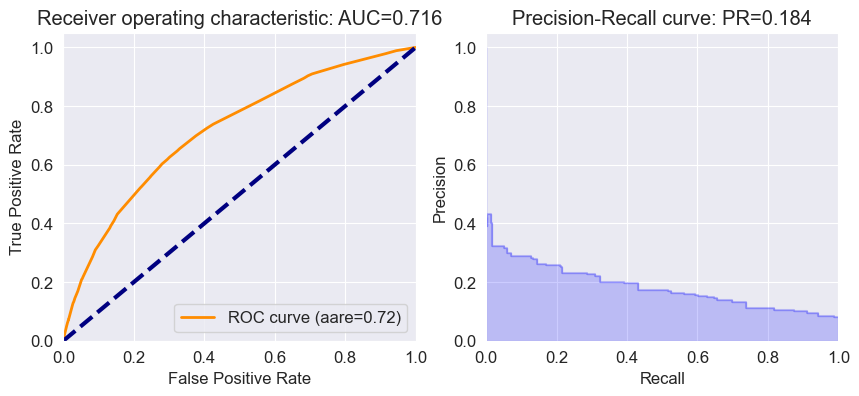

In [825]:
ROC_PR(y_test, test_proba[:,1])


- AUC = 0.72 means that the model has a moderate ability to distinguish between positive and negative classes
- Precision-Recall curve is 0.18 suggests the model struggles to correctly identify positives, indicating the model might not perform well in scenarios with class imbalance

- F1 score is a metric used to evaluate the performance of classification models, especially when dealing with imbalanced datasets. It is the harmonic mean of precision and recall, providing a single measure that balances both aspects of a model’s performance. It is particularly useful when the classes are imbalanced, meaning one class is more frequent than the other.
- It ranges from 0 (worst) to 1 (best). A high F1 score indicates a good balance between precision and recall. The F1 score is useful when the classes are imbalanced and helps avoid bias towards the majority class, offering a more fair evaluation of the model's performance.

In [828]:
from sklearn.metrics import f1_score
# Calculate the F1 score
f1 = f1_score(y_test, test_pred)  # y_test is the actual, test_pred is the prediction
print("F1 Score:", f1)

F1 Score: 0.03166710285265637


- F1 score of 0.03 is extremely low and reflects that the power of the model to make good positive predictions is weak. It could be due to issues such as class imbalance, poor data quality, or the model not being well optimized.

### F1 Score

- F1 score is a metric used to evaluate the performance of classification models, especially when dealing with imbalanced datasets. It is the harmonic mean of precision and recall, providing a single measure that balances both aspects of a model’s performance. It is particularly useful when the classes are imbalanced, meaning one class is more frequent than the other.
- It ranges from 0 (worst) to 1 (best). A high F1 score indicates a good balance between precision and recall. The F1 score is useful when the classes are imbalanced and helps avoid bias towards the majority class, offering a more fair evaluation of the model's performance.

In [832]:
from sklearn.metrics import f1_score
# Calculate the F1 score
f1 = f1_score(y_test, test_pred)  # y_test is the actual, test_pred is the prediction
print("F1 Score:", f1)

F1 Score: 0.03166710285265637


# Module 4 Assignment - Feature engineering to enhance model predictability

### Feature Engineering

- Feature engineering is the process of transforming raw data into relevant information for use by machine learning models
- The accuracy of machine learning models heavily depends on the quality of the features used for training them. Feature engineering is a set of techniques that enable us to construct new features by transforming or aggregating the old ones
- Feature engineering is problem-dependent. It demands heavy data analysis and domain expertise. This is due to the fact that proper encoding for features may be influenced by the kind of model to be employed, the relationship between the predictors and output, as well as the problem a model is designed to solve
- Featuretools, TPOT (Tree-based Pipeline Optimization Tool), DataRobot are among the tools used for feature engineering

Feature engineering techniques
- Feature Creation: Generate new features
- Feature Transformation: Normalization, Scaling, Encoding,Transformation
- Feature Extraction: Dimensionality Reduction, Feature Combination, Feature Aggregation, Feature Transformation
- Feature Selection: Choose important features using Filter Method, Wrapper Method, Embedded Method
- Feature Scaling: Adjust scales using Min-Max Scaling, Standard Scaling, Robust Scaling

Advantages
- Improves Model Performance
- Improves Computational Efficiency
- Improves Model Interpretability

### Imputing Mean for continuous variables

- For handling missing values in continuous variables, they are typically filled with the mean because it is not possible for models to directly work with missing values. Missing values filled with the mean leave the global average of the dataset unchanged, and therefore there is consistency and potentially improved model performance

In [838]:
# Checking missing values

null_numerical_features = data[numerical_features].isnull().sum()
null_features = null_numerical_features[null_numerical_features > 0]
null_features


AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
OWN_CAR_AGE                     202929
CNT_FAM_MEMBERS                      2
EXT_SOURCE_1                    173378
EXT_SOURCE_2                       660
EXT_SOURCE_3                     60965
APARTMENTS_AVG                  156061
BASEMENTAREA_AVG                179943
YEARS_BEGINEXPLUATATION_AVG     150007
YEARS_BUILD_AVG                 204488
COMMONAREA_AVG                  214865
ELEVATORS_AVG                   163891
ENTRANCES_AVG                   154828
FLOORSMAX_AVG                   153020
FLOORSMIN_AVG                   208642
LANDAREA_AVG                    182590
LIVINGAPARTMENTS_AVG            210199
LIVINGAREA_AVG                  154350
NONLIVINGAPARTMENTS_AVG         213514
NONLIVINGAREA_AVG               169682
APARTMENTS_MODE                 156061
BASEMENTAREA_MODE               179943
YEARS_BEGINEXPLUATATION_MODE    150007
YEARS_BUILD_MODE                204488
COMMONAREA_MODE          

In [839]:
# Imputation with mean
for col in numerical_features:
    data[col + '_NA'] = data[col].isna().astype(int)
    mean_value = data[col].mean()
    data[col].fillna(mean_value, inplace=True)

In [840]:
null_numerical_features = data[numerical_features].isnull().sum()
null_features = null_numerical_features[null_numerical_features > 0]
null_features

Series([], dtype: int64)

- There are no missing values now in numerical_features, all are imputed by mean

### Mean Encoding for categorical variables

- Mean encoding assigns each category a numeric value that represents the mean of the target variable for that specific category

Advantages
- Simple to Implement
- Improved Model Performance

In [844]:
for col in categorical_features:
    mean_encoded = data.groupby(col)['TARGET'].mean()
    data[col + '_encoded'] = data[col].map(mean_encoded)

In [845]:
# removing the categorical_features
data = data.drop(columns=categorical_features)


## Building a decision tree model

In [847]:
# Assigning the target variable
target = 'TARGET'
# Dropping the target from X to prevent it from being used as a feature, which could cause overfitting
X_2 = data.drop(columns=[target])
# Assigning the target variable to y for model training
y_2 = data[target]

In [848]:
# splitting the dataset into train(70%) and test(30%)
from sklearn.model_selection import train_test_split
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2,test_size=0.3, random_state=0)
[X_train_2.shape,X_test_2.shape, y_train_2.shape, y_test_2.shape]

[(215257, 227), (92254, 227), (215257,), (92254,)]

In [849]:
dtree = DecisionTreeClassifier(min_samples_leaf = 5, max_depth = 6)
dtree.fit(X_train_2, y_train_2)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=5)

In [850]:
train_pred_2 = dtree.predict(X_train_2)
test_pred_2 = dtree.predict(X_test_2)
test_pred_2

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [851]:
train_proba_2 = dtree.predict_proba(X_train_2)
test_proba_2 = dtree.predict_proba(X_test_2)
test_proba_2

array([[0.67272727, 0.32727273],
       [0.96367543, 0.03632457],
       [0.83349819, 0.16650181],
       ...,
       [0.96786555, 0.03213445],
       [0.98207381, 0.01792619],
       [0.93233378, 0.06766622]])

In [852]:
test_proba_2[:,1]

array([0.32727273, 0.03632457, 0.16650181, ..., 0.03213445, 0.01792619,
       0.06766622])

In [853]:
roc_2 = roc_auc_score(y_test_2, dtree.predict_proba(X_test_2)[:, 1])
roc_2

0.715256974374907

## Comparison

In [855]:
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
tn, fp, fn, tp = confusion_matrix(y_test, test_pred).ravel()
tn_2, fp_2, fn_2, tp_2 = confusion_matrix(y_test_2, test_pred_2).ravel()

metrics = {
    'Metric': ['Accuracy training data', 'Accuracy test data','ROC AUC', 'Precision', 'Recall', 'F1 Score', 'True Negative (TN)','False Positive (FP)','False Negative (FN)','True Positive (TP)'  ],
    'Model 1': [
        accuracy_score(y_train,train_pred),
        accuracy_score(y_test,test_pred),
        roc_auc_value,
        precision_score(y_test, test_pred),
        recall_score(y_test, test_pred),
        f1_score(y_test, test_pred),
        tn, 
        fp, 
        fn, 
        tp
    ],
    'Model 2': [
        accuracy_score(y_train_2, train_pred_2),
        accuracy_score(y_test_2,test_pred_2),
        roc_2,
        precision_score(y_test_2, test_pred_2),
        recall_score(y_test_2, test_pred_2),
        f1_score(y_test_2, test_pred_2),
        tn_2, 
        fp_2, 
        fn_2, 
        tp_2
    ]
}

comparison_df = pd.DataFrame(metrics)

comparison_df

,Metric,Model 1,Model 2
0,Accuracy training data,0.919134,0.919143
1,Accuracy test data,0.919787,0.919808
2,ROC AUC,0.507177,0.715257
3,Precision,0.400662,0.403974
4,Recall,0.016485,0.016621
5,F1 Score,0.031667,0.031929
6,True Negative (TN),84733.000000,84734.000000
7,False Positive (FP),181.000000,180.000000
8,False Negative (FN),7219.000000,7218.000000
9,True Positive (TP),121.000000,122.000000


### Precision-Recall

- The precision and recall for Model 2 are slightly better than those of Model 1, but the difference is minimal.

### Accuracy

- The accuracy for training data and test data not changed significantly for model 1 and 2

### Confusion matrix

- For Model 2, there was a slight shift in the confusion matrix values: True Negatives (TN), False Positives (FP), and False Negatives (FN) increased by 1, while True Positives (TP) decreased by 1. Overall, this change does not result in a major difference in performance between Model 1 and Model 2.

### ROC

- Roc for the model 1 and model 2 is same, there is no major significance

### Gains table

In [866]:
#  Model 1
df_prep_1 = pd.DataFrame(columns=['actual', 'pred'])
df_prep_1['actual'] = y_test
df_prep_1['pred'] = test_pred
df_prep_1 = df_prep_1.sort_values(by='pred', ascending=False)
df_prep_1['row_id'] = range(0, 0 + len(df_prep_1))
df_prep_1['decile'] = (df_prep_1['row_id'] / (len(df_prep_1) / 10)).astype(int)
df_prep_1.loc[df_prep_1['decile'] == 10] = 9
gains_1 = df_prep_1.groupby('decile')['actual'].agg(['count', 'sum'])
gains_1.columns = ['count', 'actual']

gains_1['non_actual'] = gains_1['count'] - gains_1['actual']
gains_1['cum_count'] = gains_1['count'].cumsum()
gains_1['cum_actual'] = gains_1['actual'].cumsum()
gains_1['cum_non_actual'] = gains_1['non_actual'].cumsum()
gains_1['percent_cum_actual'] = (gains_1['cum_actual'] / np.max(gains_1['cum_actual'])).round(2)
gains_1['percent_cum_non_actual'] = (gains_1['cum_non_actual'] / np.max(gains_1['cum_non_actual'])).round(2)
gains_1['if_random'] = np.max(gains_1['cum_actual']) / 10
gains_1['if_random'] = gains_1['if_random'].cumsum()
gains_1['lift'] = (gains_1['cum_actual'] / gains_1['if_random']).round(2)
gains_1['K_S'] = np.abs(gains_1['percent_cum_actual'] - gains_1['percent_cum_non_actual']) * 100
gains_1['gain'] = (gains_1['cum_actual'] / gains_1['cum_count'] * 100).round(2)

#  Model 2
df_prep_2 = pd.DataFrame(columns=['actual', 'pred'])
df_prep_2['actual'] = y_test_2
df_prep_2['pred'] = test_pred_2
df_prep_2 = df_prep_2.sort_values(by='pred', ascending=False)
df_prep_2['row_id'] = range(0, 0 + len(df_prep_2))
df_prep_2['decile'] = (df_prep_2['row_id'] / (len(df_prep_2) / 10)).astype(int)
df_prep_2.loc[df_prep_2['decile'] == 10] = 9
gains_2 = df_prep_2.groupby('decile')['actual'].agg(['count', 'sum'])
gains_2.columns = ['count', 'actual']

gains_2['non_actual'] = gains_2['count'] - gains_2['actual']
gains_2['cum_count'] = gains_2['count'].cumsum()
gains_2['cum_actual'] = gains_2['actual'].cumsum()
gains_2['cum_non_actual'] = gains_2['non_actual'].cumsum()
gains_2['percent_cum_actual'] = (gains_2['cum_actual'] / np.max(gains_2['cum_actual'])).round(2)
gains_2['percent_cum_non_actual'] = (gains_2['cum_non_actual'] / np.max(gains_2['cum_non_actual'])).round(2)
gains_2['if_random'] = np.max(gains_2['cum_actual']) / 10
gains_2['if_random'] = gains_2['if_random'].cumsum()
gains_2['lift'] = (gains_2['cum_actual'] / gains_2['if_random']).round(2)
gains_2['K_S'] = np.abs(gains_2['percent_cum_actual'] - gains_2['percent_cum_non_actual']) * 100
gains_2['gain'] = (gains_2['cum_actual'] / gains_2['cum_count'] * 100).round(2)

# Compare
gains_comparison = pd.DataFrame({
    'Decile': gains_1.index,
    'Lift Model 1': gains_1['lift'],
    'Lift Model 2': gains_2['lift'],
    'K_S Model 1': gains_1['K_S'],
    'K_S Model 2': gains_2['K_S'],
    'Gain Model 1': gains_1['gain'],
    'Gain Model 2': gains_2['gain']
})

gains_comparison


,Decile,Lift Model 1,Lift Model 2,K_S Model 1,K_S Model 2,Gain Model 1,Gain Model 2
decile,,,,,,,
0,0,1.14,1.14,1.0,1.0,9.04,9.06
1,1,1.05,1.05,1.0,1.0,8.32,8.34
2,2,1.03,1.03,1.0,1.0,8.20,8.20
3,3,1.02,1.02,1.0,1.0,8.15,8.15
4,4,1.02,1.02,1.0,1.0,8.12,8.12
5,5,1.02,1.02,1.0,1.0,8.10,8.10
6,6,1.01,1.01,1.0,1.0,8.03,8.03
7,7,1.00,1.00,0.0,0.0,7.97,7.97
8,8,1.00,1.00,0.0,0.0,7.93,7.93


- The gain for Model 2 is slightly higher in deciles 0 and 1, with the remaining deciles showing no significant change when compared to Model 1.

### lift, Komogorov-Smirnov (K-S)

- The lift,K-S for model 1 and model 2 is exactly same

### Conclusion

- The primary distinction between Model 1 and Model 2 lies in the data preprocessing steps: Model 2 incorporates mean imputation for continuous variables and mean encoding for categorical variables, while Model 1 does not. However, when comparing the evaluation metrics of both models, Model 2 performs slightly better than Model 1, but the difference is minimal.

# Module 5 Assignment - Building Logistic Regression Models

## Logistic Regression

- Logistic regression is a supervised learning technique for classification tasks in which the aim is to determine the probability of an example belonging to a specified class or not
- The logistic regression model transforms the linear regression function continuous value output into categorical value output by applying a sigmoid function mapping any real-valued set of input independent variables into a value between 0 and 1. This kind of function is known as the logistic function
- It is used in Fraud detection, Disease prediction and Churn prediction

## Feature Engineering

In [1033]:
# Separate the categorical and numerical variables from the important features
# categorical features
categorical_features_log_r = [feature for feature in imp_features if feature in data.select_dtypes(include=['object']).columns]
# Numerical features
numerical_features_log_r = [feature for feature in imp_features if feature in data.select_dtypes(include=['float64', 'int64']).columns]
# Assigning target 
target = 'TARGET'
# Converting into numerical feature dataframe
numerical_features_log_r_df = data[numerical_features_log_r]


In [1034]:
# Remove the target variable from the numerical dataframe to prevent data leakage
numerical_features_log_r_df = numerical_features_log_r_df.drop(target, axis=1, errors='ignore')


In [1035]:
# Impute missing values in the numerical features using the mean
for column in numerical_features_log_r_df.columns:
    mean_value = numerical_features_log_r_df[column].mean() 
    numerical_features_log_r_df[column].fillna(mean_value, inplace=True)  

In [1036]:
# One-hot encoding
# One-hot encoding is used to convert categorical variables into a numerical format so that they can be used in machine learning models

import category_encoders as ce
for_dummyX_log_r = data[categorical_features_log_r]
# Fit to data, then transform it.
ec_log_r = ce.OneHotEncoder(cols=categorical_features_log_r, use_cat_names=True, handle_unknown='indicator').fit(for_dummyX_log_r)
X_dummy_log_r = ec_log_r.fit_transform(for_dummyX_log_r)
X_dummy_log_r.head()
X_dummy_log_r.shape

(307511, 162)

In [1037]:
# Concating numerical features and one hot encoded categorical features
X_log_r = pd.concat([X_dummy_log_r, numerical_features_log_r_df], axis=1)
X_log_r.shape

(307511, 176)

In [1043]:
# Standardize the data
# StandardScaler standardizes the data by subtracting the mean and scaling it to have a unit variance, ensuring that all features contribute equally. 
# This process enhances model performance by bringing all features to the same scale and improving the effectiveness of machine learning algorithms.
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize the DataFrame
X_scaled_log_r = pd.DataFrame(scaler.fit_transform(X_log_r), columns=X_log_r.columns)

X_scaled_log_r.head()

,CODE_GENDER_M,CODE_GENDER_F,CODE_GENDER_XNA,CODE_GENDER_-1,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,EMERGENCYSTATE_MODE_nan,EMERGENCYSTATE_MODE_-1,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_CAR_-1,FLAG_OWN_REALTY_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_-1,FONDKAPREMONT_MODE_reg oper account,FONDKAPREMONT_MODE_org spec account,FONDKAPREMONT_MODE_reg oper spec account,FONDKAPREMONT_MODE_not specified,FONDKAPREMONT_MODE_nan,FONDKAPREMONT_MODE_-1,HOUSETYPE_MODE_block of flats,HOUSETYPE_MODE_terraced house,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_nan,HOUSETYPE_MODE_-1,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,NAME_CONTRACT_TYPE_-1,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_-1,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Widow,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_-1,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_-1,NAME_INCOME_TYPE_Working,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_-1,NAME_TYPE_SUITE_Unaccompanied,NAME_TYPE_SUITE_Family,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_nan,NAME_TYPE_SUITE_-1,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_Waiters/barmen staff,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_nan,OCCUPATION_TYPE_-1,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_XNA,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Cleaning,ORGAN

In [1044]:
# splitting the dataset into train(70%) and test(30%)
from sklearn.model_selection import train_test_split
X_train_log_r, X_test_log_r, y_train_log_r, y_test_log_r = train_test_split(X_scaled_log_r, data[target], test_size=0.3,random_state=0)
[X_train_log_r.shape,X_test_log_r.shape, y_train_log_r.shape, y_test_log_r.shape]

[(215257, 176), (92254, 176), (215257,), (92254,)]

## logistic regression model 

In [1047]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create logistic regression model
model_log_r = LogisticRegression()

# Fit the model on the training data
model_log_r.fit(X_train_log_r, y_train_log_r)

# Make predictions on the test data
y_pred_log_r = model_log_r.predict(X_test_log_r)


Accuracy: 0.92
Confusion Matrix:
[[84830    84]
 [ 7279    61]]
ROC AUC: 0.72
Precision-Recall AUC: 0.19


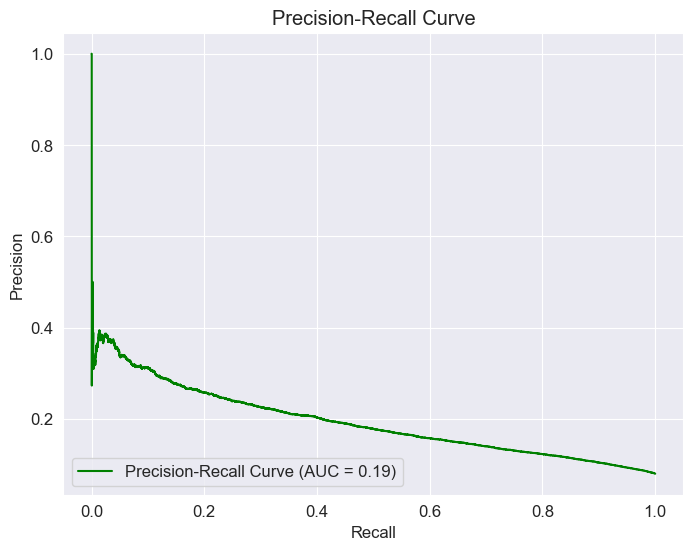

F1 Score: 0.00
Gains Table Values:
   Threshold  Cumulative Gain
0   0.634583         0.000086
1   0.625345         0.000172
2   0.615200         0.000255
3   0.612972         0.000339
4   0.604431         0.000421


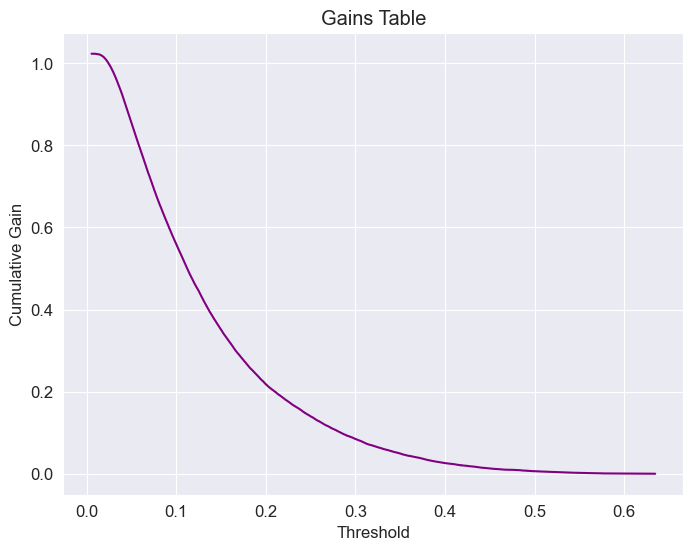

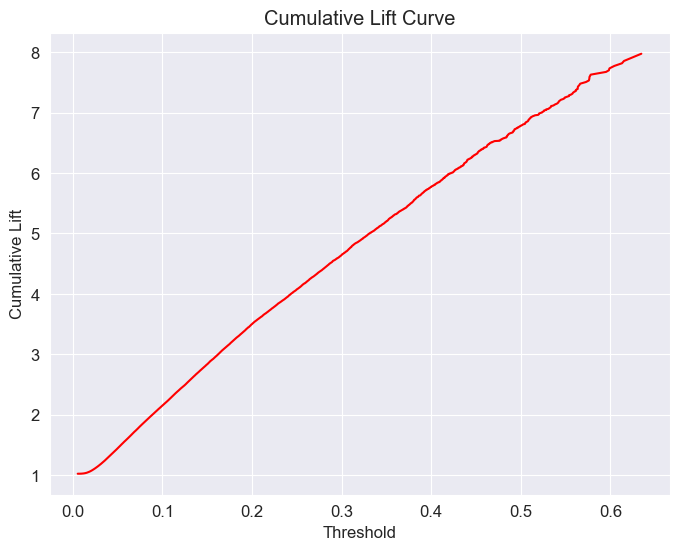

Kolmogorov-Smirnov Statistic: 0.33
Precision: 0.4206896551724138
Recall: 0.008310626702997275
ROC: 0.7231277787771684
F1 Score: 0.016299265197060788


In [1049]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_recall_fscore_support

# Accuracy
accuracy = accuracy_score(y_test_log_r, y_pred_log_r)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix
print('Confusion Matrix:')
conf_matrix = confusion_matrix(y_test_log_r, y_pred_log_r)
print(conf_matrix)

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_log_r, probs_log_r[:, 1])
roc_auc = auc(fpr, tpr)

print(f'ROC AUC: {roc_auc:.2f}')
# plt.figure(figsize=(8, 6))
# plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
# plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve')
# plt.legend(loc='lower right')
# plt.show()

# Precision-Recall Curve and AUC
precision, recall, _ = precision_recall_curve(y_test_log_r, probs_log_r[:, 1])
pr_auc = auc(recall, precision)
print(f'Precision-Recall AUC: {pr_auc:.2f}')
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', label=f'Precision-Recall Curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

# F1 Score
f1_score = 2 * (precision[-1] * recall[-1]) / (precision[-1] + recall[-1])
print(f'F1 Score: {f1_score:.2f}')

# Gains Table (Cumulative Accuracy)
thresholds_cumsum = np.cumsum(np.sort(probs_log_r[:, 1])[::-1])
gains_table = pd.DataFrame({
    'Threshold': np.sort(probs_log_r[:, 1])[::-1],
    'Cumulative Gain': thresholds_cumsum / np.sum(y_test_log_r)
})
print('Gains Table Values:')
print(gains_table.head())  # Display the first few rows of the Gains Table
plt.figure(figsize=(8, 6))
plt.plot(gains_table['Threshold'], gains_table['Cumulative Gain'], color='purple')
plt.xlabel('Threshold')
plt.ylabel('Cumulative Gain')
plt.title('Gains Table')
plt.show()

# Cumulative Lift Curve
cumulative_lift = (thresholds_cumsum / np.sum(y_test_log_r)) / (np.arange(1, len(y_test_log_r) + 1) / len(y_test_log_r))
plt.figure(figsize=(8, 6))
plt.plot(np.sort(probs_log_r[:, 1])[::-1], cumulative_lift, color='red')
plt.xlabel('Threshold')
plt.ylabel('Cumulative Lift')
plt.title('Cumulative Lift Curve')
plt.show()

# Kolmogorov-Smirnov (K-S) Statistic
ks_statistic = np.max(np.abs(tpr - fpr))
print(f'Kolmogorov-Smirnov Statistic: {ks_statistic:.2f}')

# Print precision, recall, and roc values
precision_val = precision_score(y_test_log_r, y_pred_log_r)
recall_val = recall_score(y_test_log_r, y_pred_log_r)
roc_auc_val = roc_auc_score(y_test_log_r, probs_log_r[:, 1])
print('Precision:', precision_val)
print('Recall:', recall_val)
print('ROC:',roc_auc_val)
from sklearn.metrics import f1_score

# Ensure no variable is named 'f1_score' before using the function
f1_log_r = f1_score(y_test_log_r, y_pred_log_r)

# Print the F1 score
print("F1 Score:", f1_log_r)


## Variable Importance Chart
- A Variable Importance Chart shows the relative importance of features in a machine learning model. It ranks features based on how much they contribute to the model's prediction

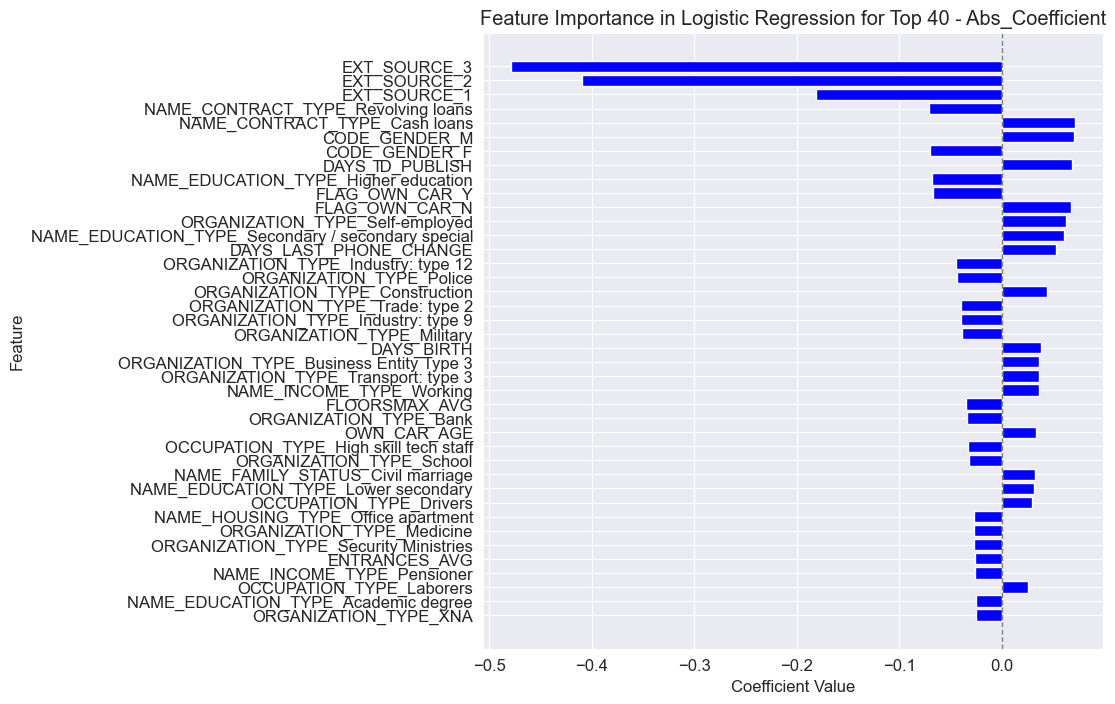

In [1053]:
def MyVarImp(model_log_r, X_log_r):
# Get feature importance (coefficients)
    importance_log_r = model_log_r.coef_[0]  # Coefficients are in model.coef_
    
    # Create a DataFrame for better visualization
    feature_names_log_r = X_log_r.columns
    importance_log_r_df = pd.DataFrame({'Feature': feature_names_log_r, 'Coefficient': importance_log_r})
    
    # Sort by absolute importance
    importance_log_r_df['Abs_Coefficient'] = np.abs(importance_log_r_df['Coefficient'])
    importance_log_r_df = importance_log_r_df.sort_values(by='Abs_Coefficient', ascending=True)
    top_features_log_r_df = importance_log_r_df.tail(40)
    plt.figure(figsize=(8, 8))
    plt.barh(top_features_log_r_df['Feature'], top_features_log_r_df['Coefficient'], color='blue')
    plt.xlabel('Coefficient Value')
    plt.ylabel('Feature')
    plt.title('Feature Importance in Logistic Regression for Top 40 - Abs_Coefficient')
    plt.axvline(x=0, color='gray', linestyle='--', linewidth=1)
    plt.show()
MyVarImp(model_log_r, X_train_log_r)

- EXT_SOURCE_3, EXT_SOURCE_2, EXT_SOURCE_1 and NAME_CONTRACT_TYPE Revolving loans variables possess negative coefficients within the model. This implies that higher values of the external sources and possession of these types of contracts lower the probability of a positive outcome for the target variable.
- NAME_CONTRACT_TYPE cash loans,CODE_GENDER F, NAME_EDUCATION_TYPE Higher education  is positively correlated with the outcome

In [900]:
# Predict probabilities on test set
probs_log_r = model_log_r.predict_proba(X_test_log_r)
# Print probability predictions for the first 5 instances
print("Predicted probabilities (first 5 rows):")
print(probs_log_r[:5])

Predicted probabilities (first 5 rows):
[[0.75567577 0.24432423]
 [0.98031985 0.01968015]
 [0.84831444 0.15168556]
 [0.94986388 0.05013612]
 [0.76160329 0.23839671]]


## Evaluation metric

### Accuracy

In [903]:
accuracy_log_r = accuracy_score(y_test_log_r, y_pred_log_r)
print(f'Accuracy: {accuracy_log_r:.2f}')

Accuracy: 0.92


- The accuracy for the model is 0.92 which is considered a good score. This indicates that the model has effectively learned the patterns in the training data, with 91.91% of the predictions being correct.

### Confusion matrix

In [907]:
cm_log_r = pd.DataFrame(confusion_matrix(y_test_log_r,y_pred_log_r))
cm_log_r.rename(columns={0:'Predicted Negative', 1:'Predicted Positive'},
         index = {0:'Actual Negative',1:'Actual Positive'},inplace=True)
cm_log_r

,Predicted Negative,Predicted Positive
Actual Negative,84856,58
Actual Positive,7314,26


In [908]:
# ravel() is used to flatten the matrix (which is a 2x2 array for binary classification) into a 1D array
tn_log_r, fp_log_r, fn_log_r, tp_log_r = confusion_matrix(y_test_log_r, y_pred_log_r).ravel()
tn_log_r, fp_log_r, fn_log_r, tp_log_r

(84856, 58, 7314, 26)

- True Negatives - 84856 instances were correctly predicted as the negative class
- False Positives - 58 instances were incorrectly predicted as the positive class, but they actually belong to the negative class
- False Negatives - 7314 instances were incorrectly predicted as the negative class, but they actually belong to the positive class
- True Positives  - 26 instances were correctly predicted as the positive class

The model has a high number of True Negatives (84856), which means it is very good at identifying instances of the negative class (TARGET=0). However, the False Negatives (7314) are relatively high compared to the True Positives (26), indicating that the model struggles to correctly identify the positive class (TARGET=1). This suggests that the model is biased towards predicting the negative class and has difficulty detecting positive instances.

### ROC Curve

In [913]:
roc_auc_log_r = roc_auc_score(y_test_log_r, probs_log_r[:, 1])
roc_auc_log_r

0.7231277787771684

ROC AUC: 0.72


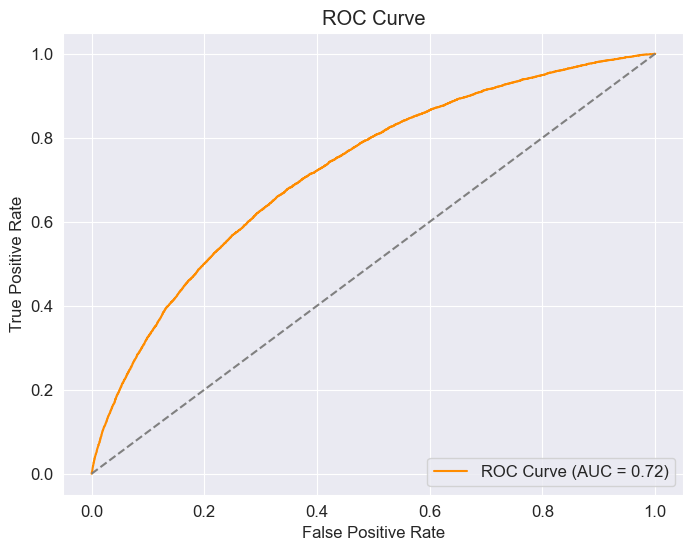

In [915]:
fpr, tpr, thresholds = roc_curve(y_test_log_r, probs_log_r[:, 1])
roc_auc = auc(fpr, tpr)

print(f'ROC AUC: {roc_auc:.2f}')
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


- Since the ROC AUC is 0.72, the area under the orange curve is larger than the blue dotted line, indicating that the model performs better than random chance. This suggests that the model is effectively distinguishing between the positive and negative classes.

### Gains table

In [922]:
df_prep_log_r = pd.DataFrame(columns = ['actual', 'pred'])
df_prep_log_r['actual'] = y_test_log_r 
df_prep_log_r['pred'] = y_pred_log_r
df_prep_log_r = df_prep_log_r.sort_values(by='pred', ascending=False)
df_prep_log_r['row_id'] = range(0, len(df_prep_log_r)) 
df_prep_log_r.head()


,actual,pred,row_id
20718,0,1,0
68172,0,1,1
202139,1,1,2
92178,1,1,3
261014,0,1,4


- The actual values for these rows are both 0 and 1, so the model is likely to be misclassifying some of the examples, particularly those with actual target value 0. This outcome suggests the model may be biased towards predicting the positive class

In [925]:
df_prep_log_r['decile'] = (df_prep_log_r['row_id'] / (len(df_prep_log_r) / 10)).astype(int)
df_prep_log_r.loc[df_prep_log_r['decile'] == 10, 'decile'] = 9  # Fixing the last decile to be 9 instead of 10
df_prep_log_r['decile'].value_counts()


decile
0    9226
2    9226
5    9226
7    9226
1    9225
3    9225
4    9225
6    9225
8    9225
9    9225
Name: count, dtype: int64

- Above code splits the sorted data into 10 deciles, with each decile containing around 9226 rows

In [927]:
gains_log_r = df_prep_log_r.groupby('decile')['actual'].agg(['count','sum'])
gains_log_r.columns = ['count','actual']
gains_log_r

,count,actual
decile,,
0,9226,762
1,9225,707
2,9226,736
3,9225,747
4,9225,744
5,9226,756
6,9225,707
7,9226,706
8,9225,711


- The table shows the number of records in each decile (approximately 9226), with the sum indicating the count of positive instances (TARGET = 1) in each decile
- In decile 0, the count of records is 9226, with 792 positive instances and 8432 negative instances.

In [931]:
gains_log_r['non_actual'] = gains_log_r['count'] - gains_log_r['actual']
gains_log_r['cum_count'] = gains_log_r['count'].cumsum()
gains_log_r['cum_actual'] = gains_log_r['actual'].cumsum()
gains_log_r['cum_non_actual'] = gains_log_r['non_actual'].cumsum()
gains_log_r['percent_cum_actual'] = (gains_log_r['cum_actual'] / np.max(gains_log_r['cum_actual'])).round(2)
gains_log_r['percent_cum_non_actual'] = (gains_log_r['cum_non_actual'] / np.max(gains_log_r['cum_non_actual'])).round(2)
gains_log_r['if_random'] = np.max(gains_log_r['cum_actual']) / 10
gains_log_r['if_random'] = gains_log_r['if_random'].cumsum()
gains_log_r['lift'] = (gains_log_r['cum_actual'] / gains_log_r['if_random']).round(2)
gains_log_r['K_S'] = np.abs(gains_log_r['percent_cum_actual'] - gains_log_r['percent_cum_non_actual']) * 100
gains_log_r['gain'] = (gains_log_r['cum_actual'] / gains_log_r['cum_count'] * 100).round(2)
gains_log_r

,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,9226,762,8464,9226,762,8464,0.10,0.1,734.0,1.04,0.0,8.26
1,9225,707,8518,18451,1469,16982,0.20,0.2,1468.0,1.00,0.0,7.96
2,9226,736,8490,27677,2205,25472,0.30,0.3,2202.0,1.00,0.0,7.97
3,9225,747,8478,36902,2952,33950,0.40,0.4,2936.0,1.01,0.0,8.00
4,9225,744,8481,46127,3696,42431,0.50,0.5,3670.0,1.01,0.0,8.01
5,9226,756,8470,55353,4452,50901,0.61,0.6,4404.0,1.01,1.0,8.04
6,9225,707,8518,64578,5159,59419,0.70,0.7,5138.0,1.00,0.0,7.99
7,9226,706,8520,73804,5865,67939,0.80,0.8,5872.0,1.00,0.0,7.95
8,9225,711,8514,83029,6576,76453,0.90,0.9,6606.0,1.00,0.0,7.92


Observations
- The actual count are greater for top decile(0) than bottom decile
- if_random declines at decile 0 and steadily rise means the best performance of the model occurs in the higher deciles and lower deciles are more difficult to identify.
- lift also high at top decile indicating model performs best at top deciles, it indicates the model performance starts to deteriorate as we go down
- Max gain occurs at decile 0 and gradually decreasing, indicating that model is improving to spot positive instances in the leading decile

### Cumulative lift curve

<Axes: xlabel='decile'>

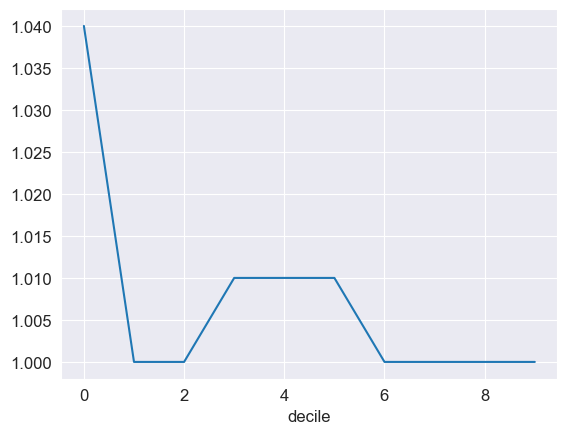

In [934]:
# The cumulative lift curve
gains_log_r['lift'].plot.line()

- The plot shows the model does well at the higher decile and is performance decreasing slowly afterwards(not capturing most of the positive cases in the later deciles)

### Komogorov-Smirnov (K-S)

<Axes: xlabel='decile'>

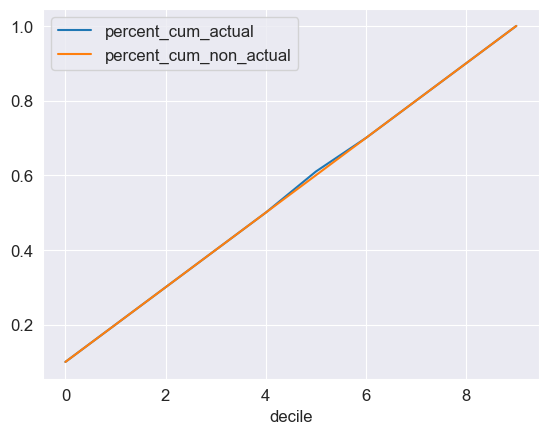

In [937]:
gains_log_r[['percent_cum_actual','percent_cum_non_actual']].plot.line()


- The cumulative percentages of both actual positive and non-positive instances are quite similar across the deciles. This can imply that the model's ability to distinguish between positive and negative classes isn't very strong

### Precision-Recall

In [940]:
precision_log_r = precision_score(y_test_log_r, y_pred_log_r)
recall_log_r = recall_score(y_test_log_r, y_pred_log_r)

print(f'Precision: {precision_log_r:.3f}')
print(f'Recall: {recall_log_r:.3f}')

Precision: 0.310
Recall: 0.004


- The model's precision is 0.310, meaning that about 31.0% of the cases it predicted as positive are actually correct. However, its recall is very low at 0.004, which means it is only identifying 0.8% of the actual positive cases.

### F1 Score

In [943]:
f1_log_r = f1_score(y_test_log_r, y_pred_log_r)
print(f"F1 Score: {f1_log_r}")

F1 Score: 0.007004310344827586


- F1 score of 0.007 is extremely low and reflects that the power of the model to make good positive predictions is weak. 

In [945]:
precision, recall, _ = precision_recall_curve(y_test_log_r, probs_log_r[:, 1])
pr_auc = auc(recall, precision)
print(f'Precision-Recall AUC: {pr_auc:.2f}')

# Kolmogorov-Smirnov (K-S) Statistic
fpr, tpr, _ = roc_curve(y_test_log_r, probs_log_r[:, 1])
ks_statistic = np.max(np.abs(tpr - fpr))
print(f'Kolmogorov-Smirnov Statistic: {ks_statistic:.2f}')

Precision-Recall AUC: 0.19
Kolmogorov-Smirnov Statistic: 0.33


- The smaller AUC value (e.g., 0.19) suggests that the model is struggling to distinguish between the positive and the negative classes, and thus signifies a poor-performing model. For a good-performing model, the AUC value must be close to 1.

- K-S statistic is the measure of largest difference between the true positive rate (TPR) and false positive rate (FPR) for all possible thresholds. 0.33 is a measure of moderate class separation. The higher the value of K-S, the more powerful the model to distinguish between positive and negative classes.

## Comparision

In [1006]:
metrics = {
    'Metric': ['Accuracy', 'ROC AUC', 'True Negative (TN)', 'False Positive (FP)', 'False Negative (FN)', 'True Positive (TP)', 'Precision', 'Recall', 'F1 Score'],
    'Tree model': [
        round(accuracy_score(y_test, test_pred), 2),
        round(roc_auc_value, 2),
        round(tn, 2), 
        round(fp, 2), 
        round(fn, 2), 
        round(tp, 2),
        round(precision_score(y_test, test_pred), 2),
        round(recall_score(y_test, test_pred), 2),
        round(f1, 2)
    ],
    'Logestic regression model': [
        round(accuracy_score(y_test_log_r, y_pred_log_r), 2),
        round(roc_auc, 2),
        round(tn_log_r, 2), 
        round(fp_log_r, 2), 
        round(fn_log_r, 2), 
        round(tp_log_r, 2),
        round(precision_val, 2),
        round(recall_val, 2),
        round(f1_log_r, 2)
    ]
}

comparison_df = pd.DataFrame(metrics)

# Display the DataFrame
comparison_df


,Metric,Tree model,Logestic regression model
0,Accuracy,0.92,0.92
1,ROC AUC,0.51,0.72
2,True Negative (TN),84733.00,84856.00
3,False Positive (FP),181.00,58.00
4,False Negative (FN),7219.00,7314.00
5,True Positive (TP),121.00,26.00
6,Precision,0.40,0.31
7,Recall,0.02,0.00
8,F1 Score,0.03,0.01


## Conclusion

- Accuracy: Both models perform equally well, achieving 0.92 accuracy.
- ROC AUC: Logistic regression performs better (0.72) compared to the tree model (0.51).
- True Negatives (TN): Logistic regression has a slightly higher TN count (84856 vs. 84733).
- False Positives (FP): Logistic regression significantly reduces FP (58 vs. 181).
- False Negatives (FN): The tree model has fewer FN (7219 vs. 7314).
- True Positives (TP): The tree model detects more TP (121 vs. 26).
- Precision: The tree model has higher precision (0.40 vs. 0.31).
- Recall: The tree model outperforms logistic regression (0.02 vs. 0.00).
- F1 Score: The tree model performs better (0.03 vs. 0.01).
- Overall, the logistic regression model is better at minimizing false positives and has a higher ROC AUC, while the tree model performs better in recall, precision, and F1 score.